In [150]:
import pandas as pd
import numpy as np
pd.set_option('max_rows', 10)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [151]:
loan_data_path = "J:\LendingClubLoans2018-2020.csv";
loan_data = pd.read_csv(loan_data_path)
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77159 entries, 0 to 77158
Data columns (total 108 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   id                                          int64  
 1   emp_title                                   object 
 2   application_type                            object 
 3   home_ownership                              object 
 4   loan_status                                 object 
 5   loan_amnt                                   int64  
 6   int_rate                                    object 
 7   term                                        object 
 8   installment                                 float64
 9   grade                                       object 
 10  earliest_cr_line                            object 
 11  issue_d                                     object 
 12  last_pymnt_d                                object 
 13  next_pymnt_d                  

In [152]:
feature_missing_values = loan_data.isna().sum()
feature_missing_values = feature_missing_values.to_frame('Missing_Values')

In [153]:
percenatges_df = (loan_data.isna().sum()* 100 / len(loan_data)).to_frame('Missing_Percentages')
missing_values_stats_df = pd.concat([feature_missing_values, percenatges_df], axis=1)
missing_values_stats_df


,Missing_Values,Missing_Percentages
id,0,0.000000
emp_title,5862,7.597299
application_type,0,0.000000
home_ownership,0,0.000000
loan_status,0,0.000000
...,...,...
deferral_term,72668,94.179551
hardship_amount,71042,92.072215
hardship_payoff_balance_amount,71042,92.072215
hardship_last_payment_amount,71042,92.072215


In [154]:
missing_values_stats_df.loc['deferral_term']

Missing_Values         72668.000000
Missing_Percentages       94.179551
Name: deferral_term, dtype: float64

In [155]:
missing_values_stats_df[missing_values_stats_df['Missing_Percentages'] > 60]

,Missing_Values,Missing_Percentages
annual_inc_joint,67777,87.840693
verification_status_joint,67780,87.844581
hardship_reason,72668,94.179551
hardship_type,72668,94.179551
hardship_status,72668,94.179551
...,...,...
deferral_term,72668,94.179551
hardship_amount,71042,92.072215
hardship_payoff_balance_amount,71042,92.072215
hardship_last_payment_amount,71042,92.072215


In [156]:
more_null_values = []
for index, row in missing_values_stats_df.iterrows():
    if (row['Missing_Percentages'] > 60):
        more_null_values.append(index)

In [157]:
print('Number of Features which has more than 60 peercent of null values: ', len(more_null_values))
more_null_values

Number of Features which has more than 60 peercent of null values:  17


['annual_inc_joint',
 'verification_status_joint',
 'hardship_reason',
 'hardship_type',
 'hardship_status',
 'payment_plan_start_date',
 'dti_joint',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'revol_bal_joint',
 'deferral_term',
 'hardship_amount',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'orig_projected_additional_accrued_interest']

In [158]:
new_loan_df = loan_data.drop(more_null_values, axis=1)
# new_loan_df.info(verbose=True)

In [291]:
clustering_df = loan_data.drop(more_null_values, axis=1)

In [350]:
categorical_features = new_loan_df.select_dtypes(exclude=[np.number])
# print(len(categorical_features.columns))
# categorical_features
# new_loan_df[dtype="string"]
categorical_features.describe()

,emp_title,home_ownership,loan_status,int_rate,term,grade,earliest_cr_line,issue_d,last_pymnt_d,next_pymnt_d,verification_status,pymnt_plan,purpose,revol_util
count,71297,77159,77159,77159,77159,77159,77159,77159,77159,33256,77159,77159,77159,77056
unique,28185,5,7,129,2,7,622,16,28,9,3,1,13,1074
top,Teacher,MORTGAGE,Fully Paid,16.02%,36 months,C,Sep-05,8/1/2017,5/1/2020,Jun-20,Source Verified,n,debt_consolidation,0%
freq,1658,37334,34289,5181,52800,25152,665,17934,32333,29658,28886,77159,42980,509


In [161]:
# categorical_features.describe()
new_loan_df['application_type'].unique()

array(['Individual', 'Joint App'], dtype=object)

In [162]:
features_for_One_hot = [
    'application_type',
    'hardship_flag',
    'initial_list_status',
]

features_for_ordinal_encoder = [
    'home_ownership',
    'grade',
    'purpose',
    'verification_status'
]

In [163]:
# for i in features_for_One_hot:    
#     print(new_loan_df[i].isna().sum())
# #     # integer encode
#     label_encoder = LabelEncoder()
#     integer_encoded = label_encoder.fit_transform(new_loan_df[i])
#     print(integer_encoded)
#     # binary encode
#     onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
#     integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#     print(onehot_encoder.fit_transform(integer_encoded))

In [164]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
for i in features_for_One_hot:
    nullFlag = False
    nullList = []
    # integer encode
    if new_loan_df[i].isna().sum() > 0:
        nullFlag = True
        nullList = list(new_loan_df.loc[pd.isna(new_loan_df[i]), :].index)

    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(new_loan_df[i])

    
    onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    new_loan_df[i] = onehot_encoder.fit_transform(integer_encoded)
    if nullFlag:
        new_loan_df.loc[nullList,i] = np.nan
new_loan_df[features_for_One_hot]


,application_type,hardship_flag,initial_list_status
0,1.0,1.0,0.0
1,1.0,1.0,0.0
2,1.0,1.0,0.0
3,1.0,1.0,0.0
4,1.0,1.0,0.0
...,...,...,...
77154,1.0,1.0,0.0
77155,1.0,1.0,0.0
77156,1.0,1.0,0.0
77157,1.0,1.0,0.0


In [165]:
new_loan_df['hardship_flag'].isna().sum()

1627

In [166]:
new_loan_df[features_for_ordinal_encoder].isna().sum()

home_ownership         0
grade                  0
purpose                0
verification_status    0
dtype: int64

##### new_loan_df['initial_list_status'].unique()

In [167]:
import category_encoders as ce
enc = ce.OrdinalEncoder(cols=features_for_ordinal_encoder, handle_missing='return_nan', return_df= True)

#We now fit the model and transform the data and put it in X which is a dataframe
transformed_loan_df=enc.fit_transform(new_loan_df)
type(transformed_loan_df)

C:\Users\Waqar Ayub\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


pandas.core.frame.DataFrame

In [168]:
# transformed_loan_df['int_rate'] = transformed_loan_df['int_rate'].str.split('%').str[0]
transformed_loan_df['int_rate'] = transformed_loan_df['int_rate'].str.rstrip('%').astype('float') / 100.0
transformed_loan_df['int_rate']

0        0.1505
1        0.1408
2        0.1408
3        0.1903
4        0.0890
          ...  
77154    0.1505
77155    0.0797
77156    0.0532
77157    0.2000
77158    0.0993
Name: int_rate, Length: 77159, dtype: float64

In [169]:
transformed_loan_df['revol_util'] = transformed_loan_df['revol_util'].str.rstrip('%').astype('float') / 100.0
transformed_loan_df['revol_util']

0        0.563
1        0.435
2        0.097
3        0.869
4        0.242
         ...  
77154    0.770
77155    0.590
77156    0.040
77157    0.727
77158    0.865
Name: revol_util, Length: 77159, dtype: float64

In [170]:

print(int(transformed_loan_df['term'][0].split(' ')[0]))
transformed_loan_df['term'] = [int(str(val).split(' ')[0]) for val in transformed_loan_df['term'].values]
transformed_loan_df['term']

36


0        36
1        60
2        60
3        36
4        60
         ..
77154    36
77155    36
77156    36
77157    36
77158    36
Name: term, Length: 77159, dtype: int64

In [171]:
transformed_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77159 entries, 0 to 77158
Data columns (total 91 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          77159 non-null  int64  
 1   emp_title                   71297 non-null  object 
 2   application_type            77159 non-null  float64
 3   home_ownership              77159 non-null  float64
 4   loan_status                 77159 non-null  object 
 5   loan_amnt                   77159 non-null  int64  
 6   int_rate                    77159 non-null  float64
 7   term                        77159 non-null  int64  
 8   installment                 77159 non-null  float64
 9   grade                       77159 non-null  float64
 10  earliest_cr_line            77159 non-null  object 
 11  issue_d                     77159 non-null  object 
 12  last_pymnt_d                77159 non-null  object 
 13  next_pymnt_d                332

In [172]:
unnecessary_features = [
    'id', 'emp_title', 'pymnt_plan', 'earliest_cr_line'
]
transformed_loan_df = transformed_loan_df.drop(unnecessary_features, axis=1)
transformed_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77159 entries, 0 to 77158
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   application_type            77159 non-null  float64
 1   home_ownership              77159 non-null  float64
 2   loan_status                 77159 non-null  object 
 3   loan_amnt                   77159 non-null  int64  
 4   int_rate                    77159 non-null  float64
 5   term                        77159 non-null  int64  
 6   installment                 77159 non-null  float64
 7   grade                       77159 non-null  float64
 8   issue_d                     77159 non-null  object 
 9   last_pymnt_d                77159 non-null  object 
 10  next_pymnt_d                33256 non-null  object 
 11  annual_inc                  77159 non-null  float64
 12  verification_status         77159 non-null  float64
 13  purpose                     771

In [173]:
import datetime
import dateutil
from dateutil.rrule import rrule, MONTHLY
for_dates_df = transformed_loan_df.copy()
for_dates_df['remaining_term'] = np.nan
for_dates_df['missing_term'] = np.nan
for_dates_df['next_pymnt_d'].fillna("nan",inplace=True)
for index, i in for_dates_df.iterrows():
    strt_dt = datetime.date(
        int(i['issue_d'].split('/')[2]),
        int(i['issue_d'].split('/')[0]),
        int(i['issue_d'].split('/')[1]))
    a_month = dateutil.relativedelta.relativedelta(months=i['term'])
    date_plus_month = strt_dt + a_month
    nextDate = np.nan
    if i['next_pymnt_d'] != "nan":
        nextDate = datetime.datetime.strptime(i['next_pymnt_d'],"%b-%y").strftime('%Y-%m-%d')
        next_to_date = datetime.date(
        int(nextDate.split('-')[0]),
        int(nextDate.split('-')[1]),
        int(nextDate.split('-')[2]))
        dates = [dt for dt in rrule(MONTHLY, dtstart=next_to_date, until=date_plus_month)]
        for_dates_df.at[index,'remaining_term'] = len(dates)

        last_month_date = datetime.date(
        int(i['last_pymnt_d'].split('/')[2]),
        int(i['last_pymnt_d'].split('/')[0]),
        int(i['last_pymnt_d'].split('/')[1]))
        missingInsdates = [dt for dt in rrule(MONTHLY, dtstart=last_month_date, until=next_to_date)]
        for_dates_df.at[index,'missing_term'] = len(missingInsdates) - 2




In [356]:
# for_dates_df["next_pymnt_d"].replace({"nan": np.nan}, inplace=True)
# transformed_loan_df['missing_term'] = for_dates_df['missing_term']
# transformed_loan_df['remaining_term'] = for_dates_df['remaining_term']
for_dates_df[['issue_d', 'last_pymnt_d','next_pymnt_d', 'missing_term', 'remaining_term']].sample(3)

,issue_d,last_pymnt_d,next_pymnt_d,missing_term,remaining_term
43302,11/1/2017,5/1/2020,Jun-20,0.0,6.0
10245,12/1/2017,5/1/2020,Jun-20,0.0,31.0
48662,11/1/2017,9/1/2019,NaN,NaN,NaN


In [175]:
transformed_loan_df[['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'term', 'missing_term', 'remaining_term']]

,issue_d,last_pymnt_d,next_pymnt_d,term,missing_term,remaining_term
0,8/1/2017,4/1/2020,NaN,36,NaN,NaN
1,7/1/2017,6/1/2019,NaN,60,NaN,NaN
2,7/1/2017,5/1/2020,Jun-20,60,0.0,26.0
3,8/1/2017,10/1/2019,NaN,36,NaN,NaN
4,8/1/2013,1/1/2019,NaN,60,NaN,NaN
...,...,...,...,...,...,...
77154,9/1/2017,5/1/2020,Jun-20,36,0.0,4.0
77155,9/1/2017,5/1/2020,Jun-20,36,0.0,4.0
77156,12/1/2017,5/1/2018,NaN,36,NaN,NaN
77157,8/1/2017,6/1/2018,NaN,36,NaN,NaN


In [176]:
transformed_loan_df = transformed_loan_df.drop(['issue_d', 'last_pymnt_d', 'next_pymnt_d'], axis=1)

In [177]:
# remaining_categorical_values = ['issue_d', 'last_pymnt_d', 'next_pymnt_d']
# transformed_loan_df[remaining_categorical_values].describe()

# enc = ce.OrdinalEncoder(cols=remaining_categorical_values, handle_missing='return_nan', return_df= True)

# #We now fit the model and transform the data and put it in X which is a dataframe
# ENCODED_LOAN_DF = enc.fit_transform(transformed_loan_df)
# print(ENCODED_LOAN_DF['issue_d'].unique())
# print(ENCODED_LOAN_DF['last_pymnt_d'].unique())
# print(ENCODED_LOAN_DF['next_pymnt_d'].unique())

In [178]:
transformed_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77159 entries, 0 to 77158
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   application_type            77159 non-null  float64
 1   home_ownership              77159 non-null  float64
 2   loan_status                 77159 non-null  object 
 3   loan_amnt                   77159 non-null  int64  
 4   int_rate                    77159 non-null  float64
 5   term                        77159 non-null  int64  
 6   installment                 77159 non-null  float64
 7   grade                       77159 non-null  float64
 8   annual_inc                  77159 non-null  float64
 9   verification_status         77159 non-null  float64
 10  purpose                     77159 non-null  float64
 11  hardship_flag               75532 non-null  float64
 12  dti                         77051 non-null  float64
 13  delinq_2yrs                 771

In [357]:
transformed_loan_df.shape

(77159, 86)

In [180]:
missing_values_features = []
for i in transformed_loan_df:
    if transformed_loan_df[i].isna().sum() > 0:
        missing_values_features.append(i)
print(len(missing_values_features))
missing_values_features

28


['hardship_flag',
 'dti',
 'inq_fi',
 'inq_last_12m',
 'open_acc_6m',
 'total_cu_tl',
 'total_bal_il',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'mths_since_rcnt_il',
 'mths_since_last_delinq',
 'mo_sin_old_il_acct',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'il_util',
 'bc_util',
 'all_util',
 'revol_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'avg_cur_bal',
 'bc_open_to_buy',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'missing_term',
 'remaining_term']

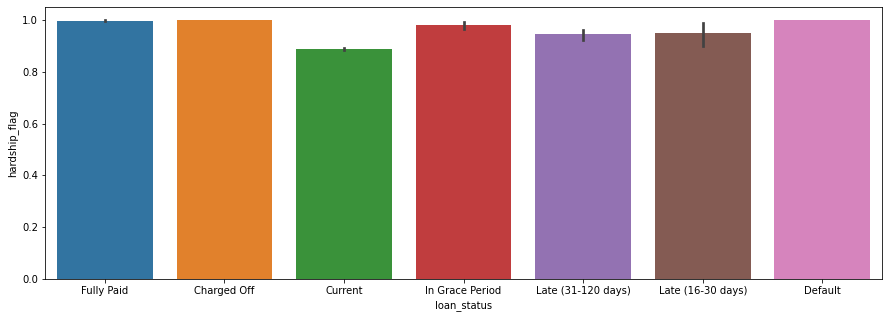

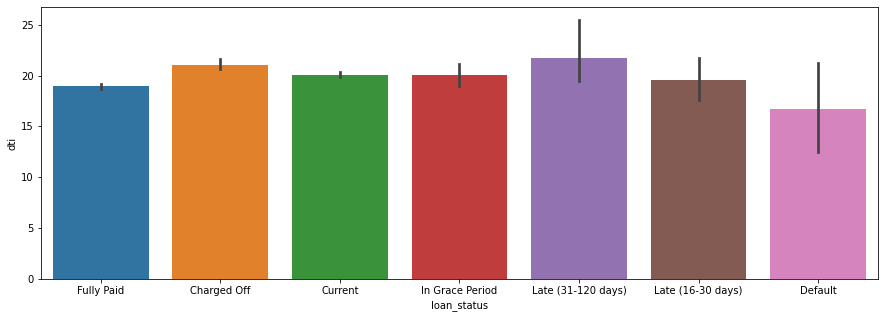

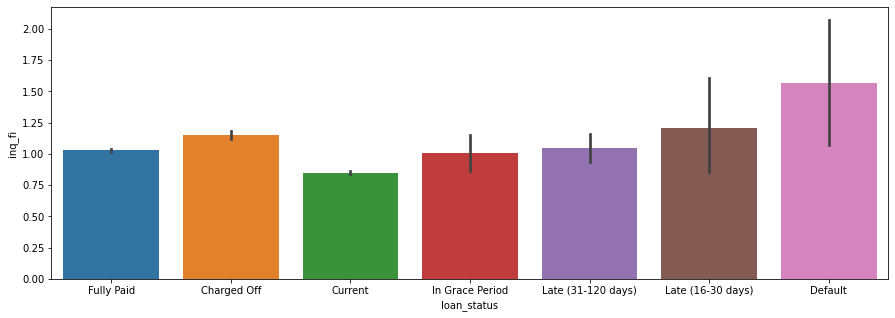

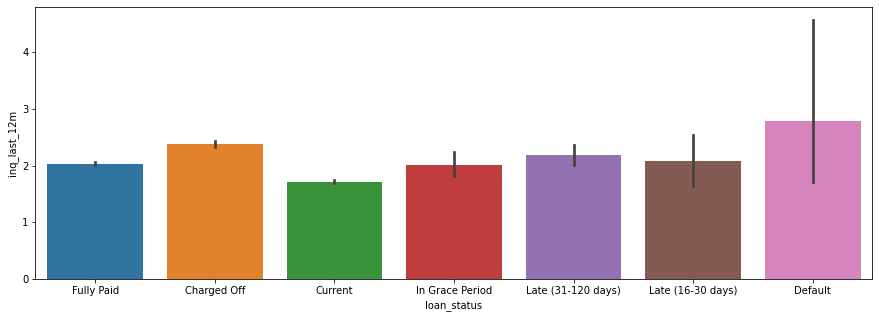

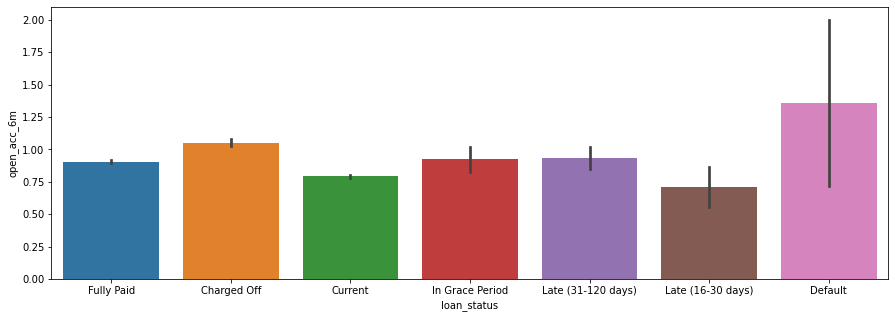

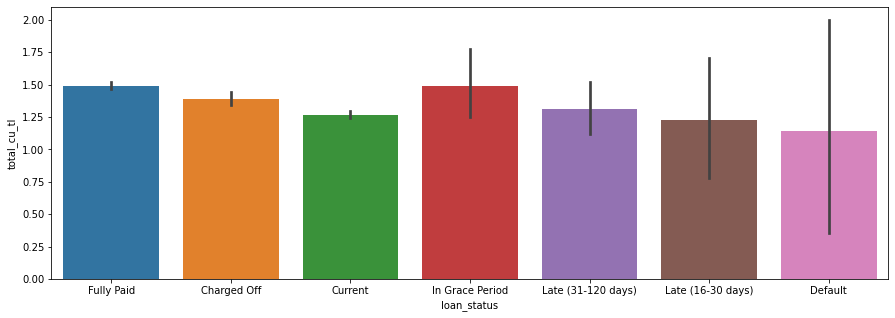

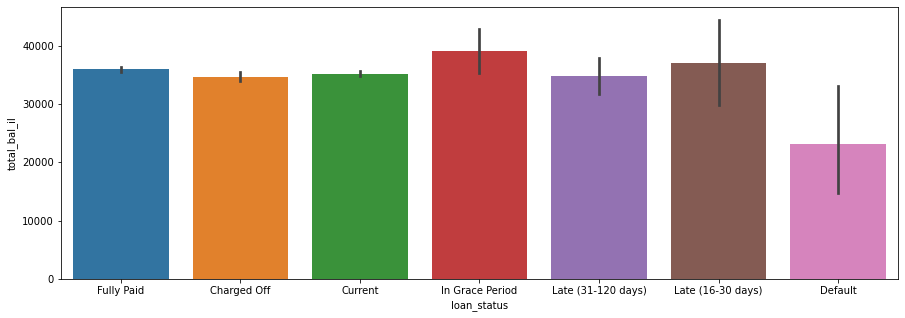

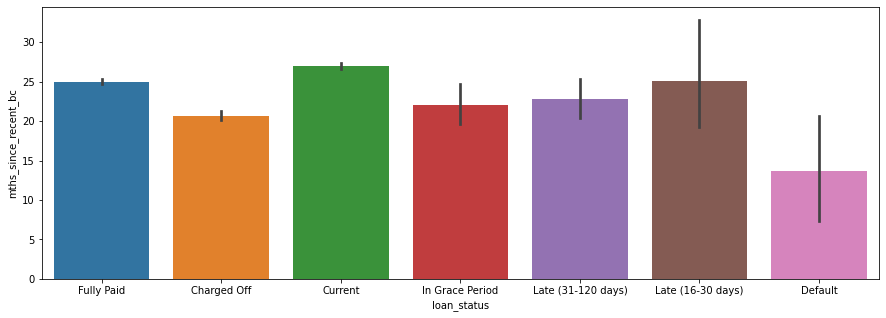

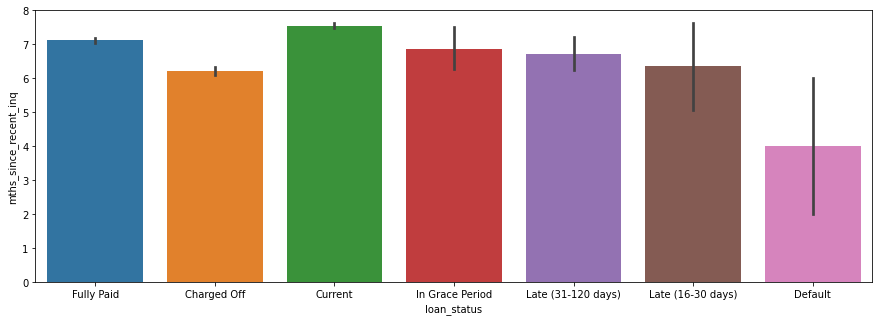

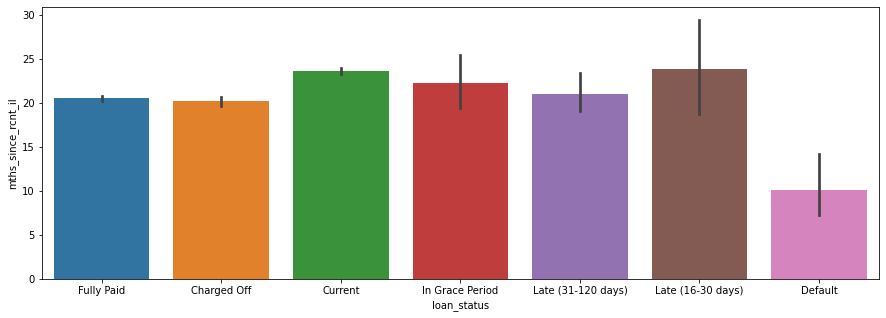

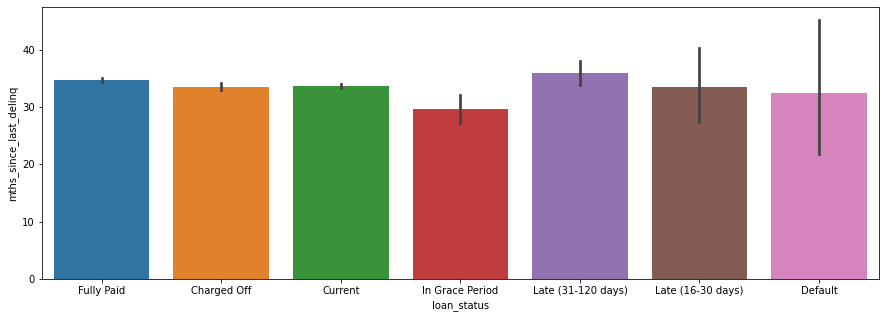

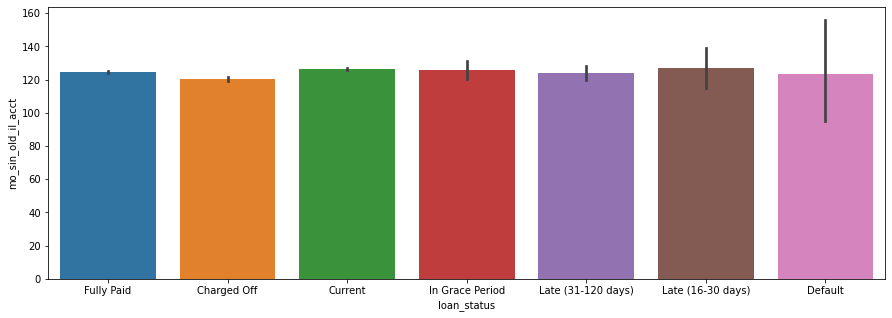

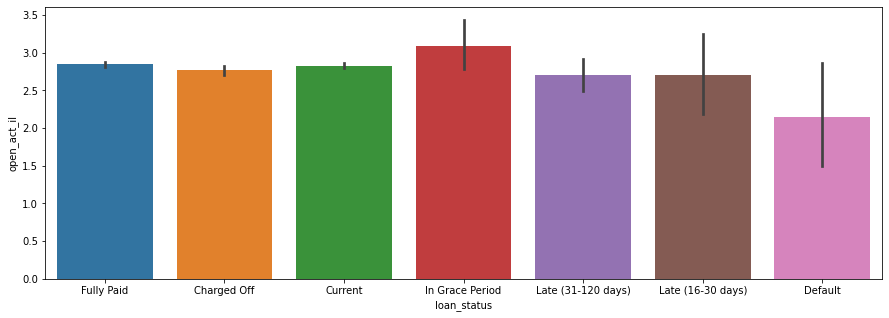

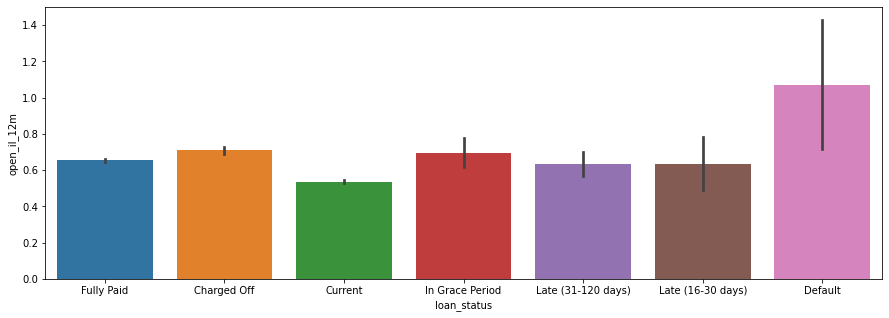

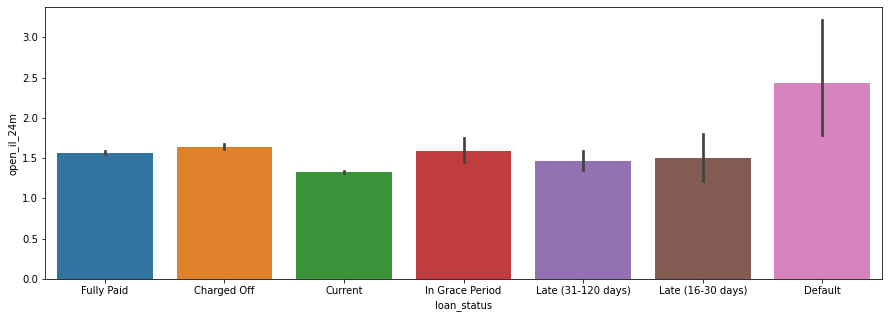

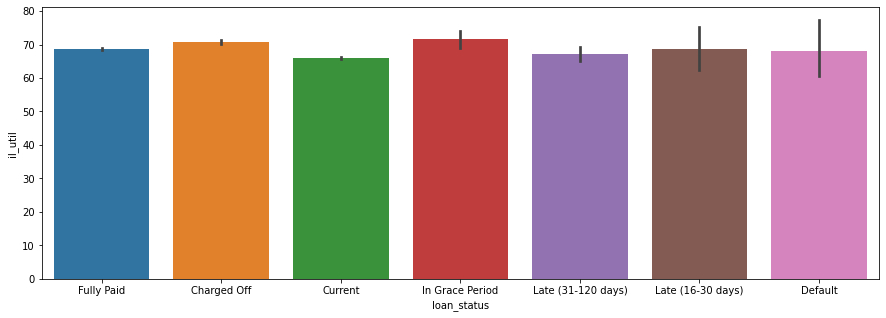

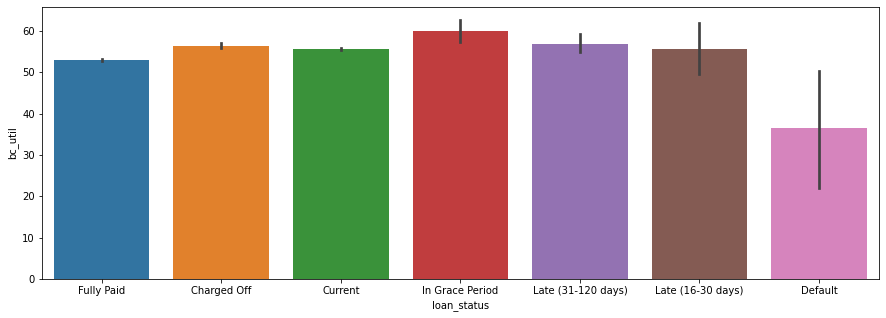

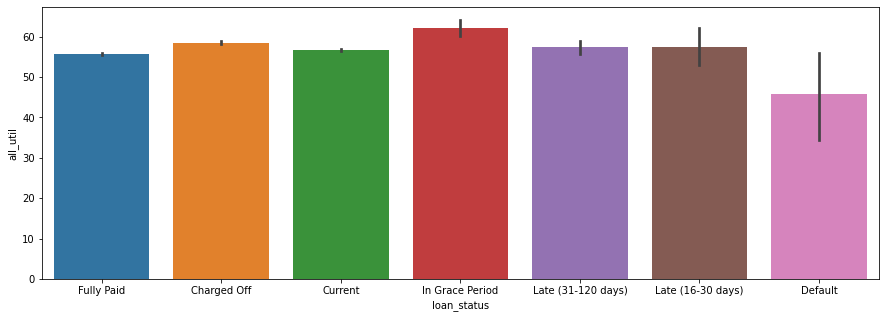

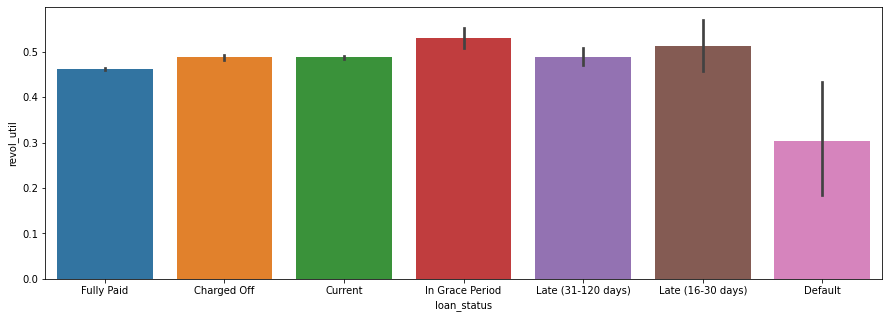

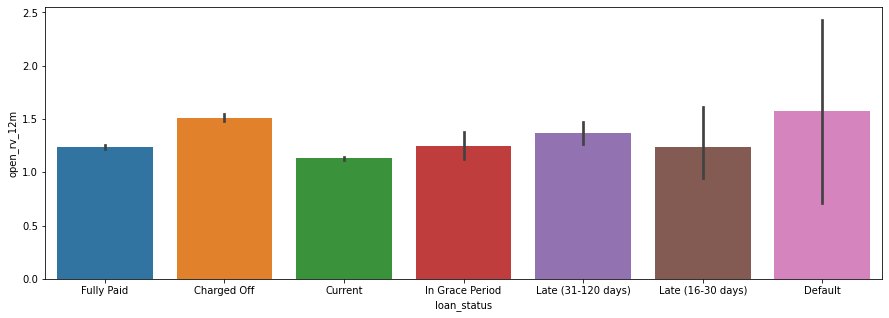

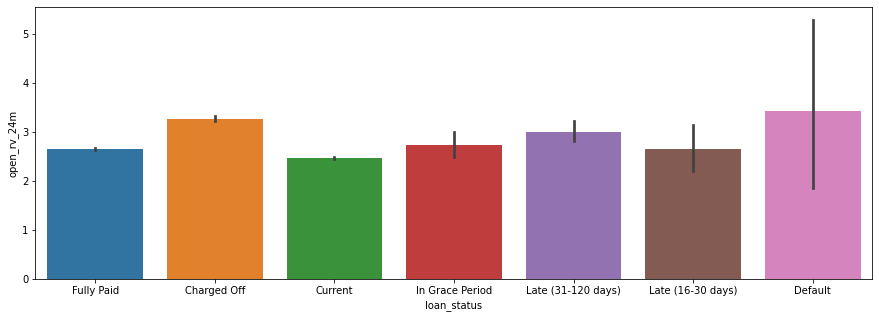

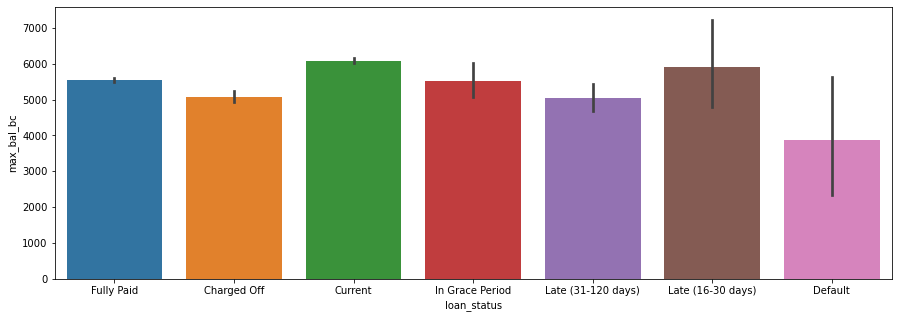

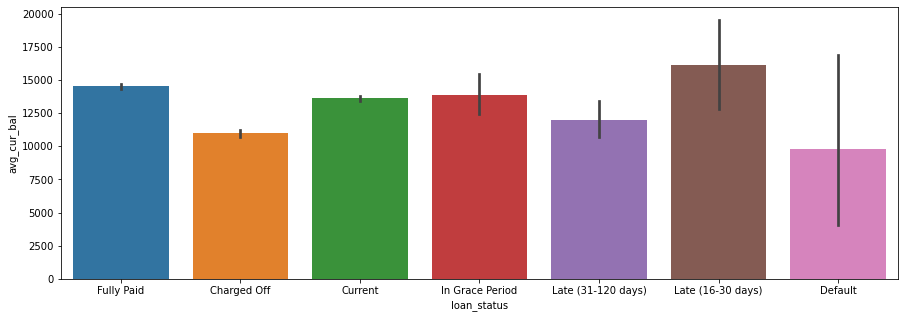

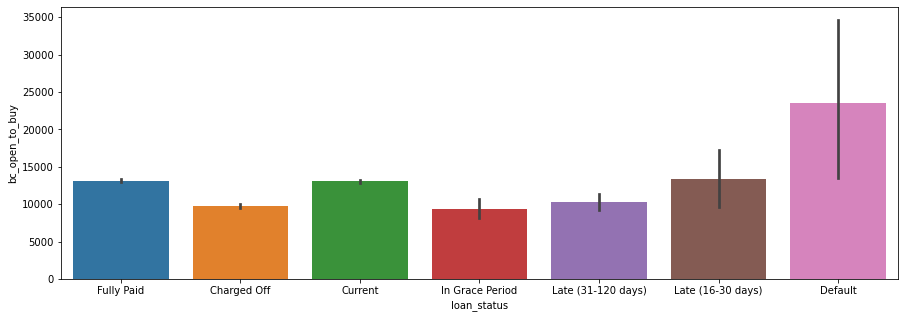

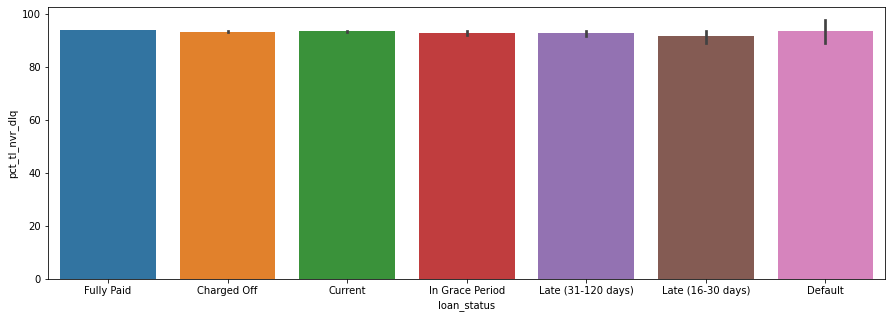

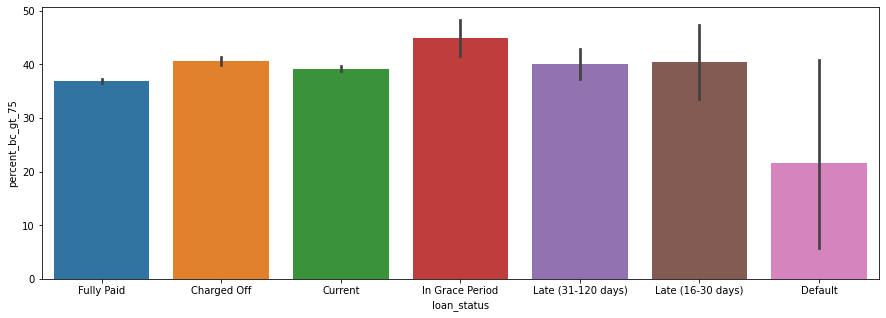

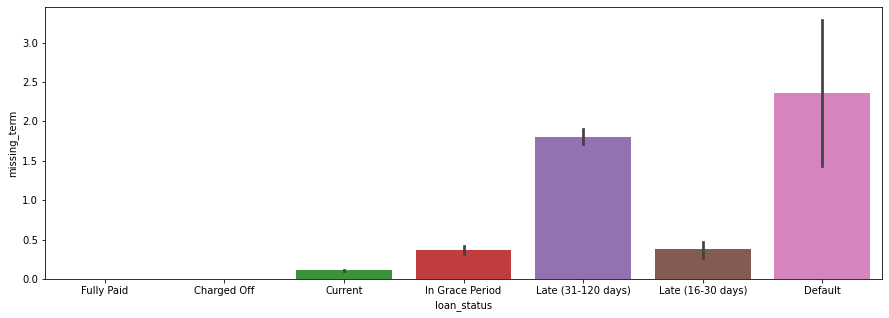

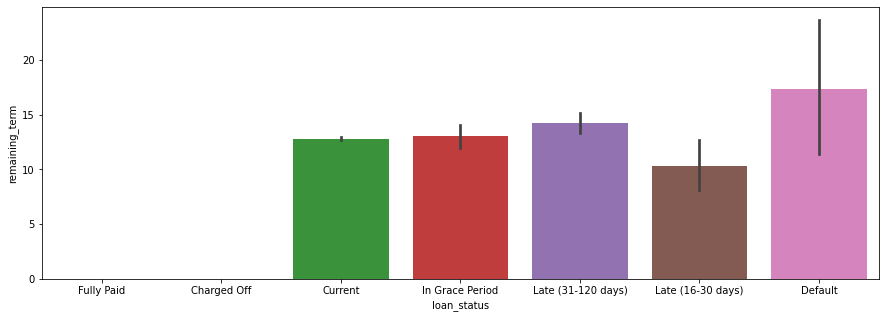

In [31]:
for i in missing_values_features:
    plt.figure(figsize=(15, 5))
    sns.barplot(x="loan_status", y=i, data=transformed_loan_df)
    plt.show()

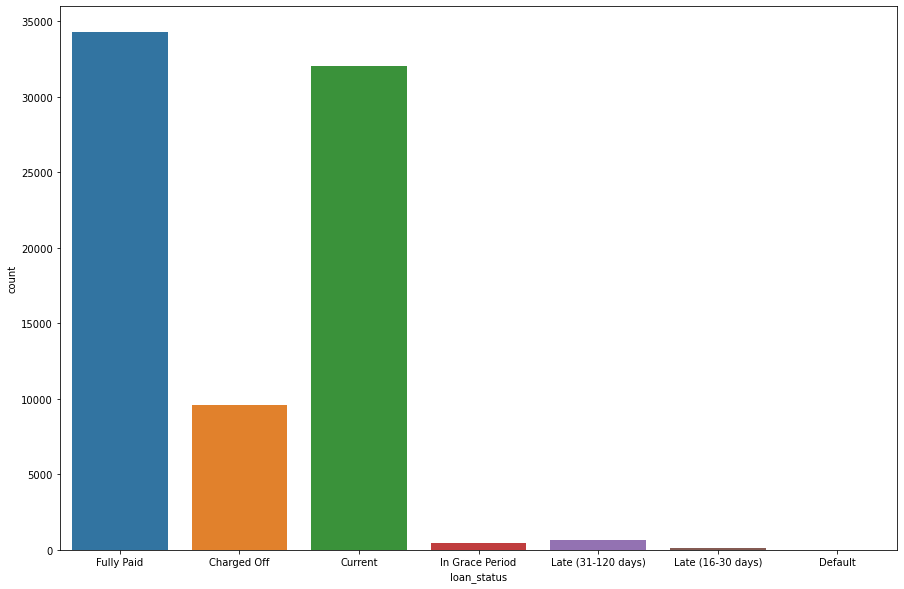

In [181]:
plt.figure(figsize=(15, 10))
sns.countplot(x='loan_status', data=transformed_loan_df)
plt.show()

In [182]:
#ENCODED_LOAN_DF[ENCODED_LOAN_DF['loan_status'] == 'Default']
#df.loc[df.Weight == "155", "Name"] = "John"
transformed_loan_df['loan_status'].mask(transformed_loan_df['loan_status'] == 'Late (31-120 days)', 'Bad Loan', inplace=True)
transformed_loan_df['loan_status'].mask(transformed_loan_df['loan_status'] == 'Late (16-30 days)', 'Bad Loan', inplace=True)
transformed_loan_df['loan_status'].mask(transformed_loan_df['loan_status'] == 'In Grace Period', 'Bad Loan', inplace=True)
transformed_loan_df['loan_status'].mask(transformed_loan_df['loan_status'] == 'Charged Off', 'Bad Loan', inplace=True)
transformed_loan_df['loan_status'].mask(transformed_loan_df['loan_status'] == 'Default', 'Bad Loan', inplace=True)

Null Values  :::::::::::::: 0
Unique Values:::::::::::::: ['Fully Paid' 'Bad Loan' 'Current']


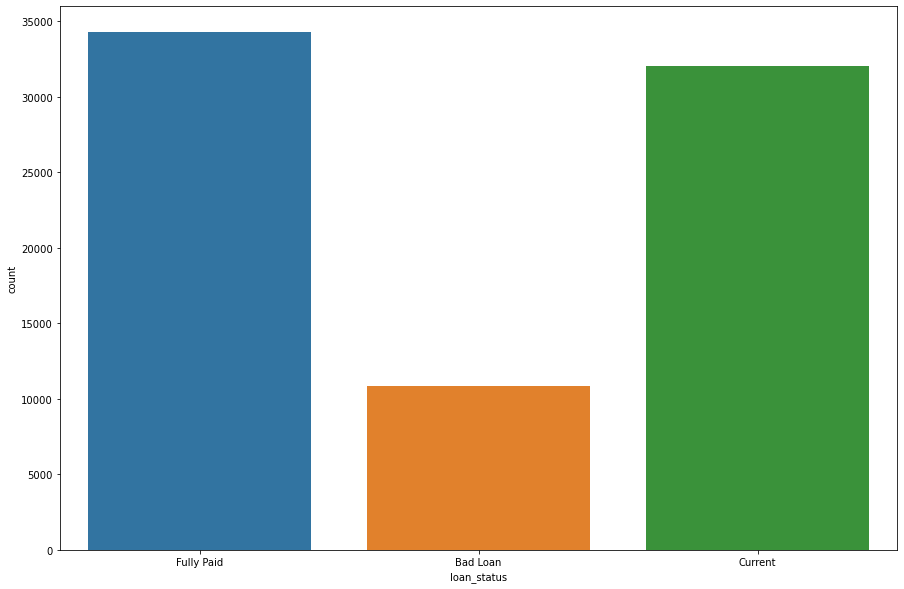

In [183]:
print('Null Values  ::::::::::::::', transformed_loan_df['loan_status'].isnull().sum())
print('Unique Values::::::::::::::', transformed_loan_df['loan_status'].unique())
plt.figure(figsize=(15, 10))
sns.countplot(x='loan_status', data=transformed_loan_df)
plt.show()

In [184]:
Y= transformed_loan_df['loan_status']
X= transformed_loan_df.drop(['loan_status'],axis = 1)

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [186]:
print('Length of Features ', len(X_train))
print('Length of Target Calss ', len(y_train))
print(y_train)
X_train.sample(3)

Length of Features  61727
Length of Target Calss  61727
55799      Bad Loan
60478      Bad Loan
53654    Fully Paid
33680    Fully Paid
20606    Fully Paid
            ...    
20609      Bad Loan
21440    Fully Paid
73349       Current
50057       Current
5192     Fully Paid
Name: loan_status, Length: 61727, dtype: object


,application_type,home_ownership,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,purpose,...,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,missing_term,remaining_term
21222,1.0,2.0,25000,0.1199,36,830.24,4.0,85000.0,2.0,1.0,...,4,10,0,2,100.0,33.3,0,0,NaN,NaN
43018,1.0,2.0,36000,0.1505,60,857.39,1.0,77000.0,3.0,1.0,...,7,15,0,0,100.0,55.6,0,0,0.0,27.0
68472,1.0,3.0,10000,0.1042,36,324.65,4.0,33280.0,3.0,5.0,...,3,10,0,1,100.0,0.0,0,0,NaN,NaN


In [187]:
missing_values_features_in_train = []
for i in X_train:
    if X_train[i].isna().sum() > 0:
        missing_values_features_in_train.append(i)
print('Missing Value Features In train Set', len(missing_values_features_in_train))
missing_values_features_in_train

Missing Value Features In train Set 28


['hardship_flag',
 'dti',
 'inq_fi',
 'inq_last_12m',
 'open_acc_6m',
 'total_cu_tl',
 'total_bal_il',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'mths_since_rcnt_il',
 'mths_since_last_delinq',
 'mo_sin_old_il_acct',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'il_util',
 'bc_util',
 'all_util',
 'revol_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'avg_cur_bal',
 'bc_open_to_buy',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'missing_term',
 'remaining_term']

In [188]:
trainingset_columns = set(X_train.columns)
intersection = trainingset_columns.intersection(categorical_features.columns)
transformed_categorical_features = list(intersection)
transformed_categorical_features

['verification_status',
 'revol_util',
 'initial_list_status',
 'purpose',
 'home_ownership',
 'hardship_flag',
 'application_type',
 'term',
 'int_rate',
 'grade']

In [189]:
print('Null Values in transformed Categorical Column:')
for i in transformed_categorical_features:
    if X_train[i].isna().sum() > 0:
        print(i, X_train[i].isna().sum())

Null Values in transformed Categorical Column:
revol_util 83
hardship_flag 1299


In [190]:
# MISSING VALUES IN COPIED DATAFRAME

In [191]:
X_train_copy = X_train.copy()
# Hardship flag is a categorical label so will not be considered for outler detection
# Because Nan values are only for the fully paid and charged off
X_train_copy['missing_term'] = X_train_copy[['missing_term']].fillna(value=0)
X_train_copy['remaining_term'] = X_train_copy[['remaining_term']].fillna(value=0)
X_train_copy['revol_util'] = X_train_copy[['revol_util']].fillna(value=0)

# X_train_copy.drop(unnecessary_features, axis=1)

In [192]:
print(transformed_categorical_features)
X_train_copy = X_train_copy.drop([
    'hardship_flag',
    'initial_list_status',
    'grade', 
    'application_type', 
    'purpose', 
    'home_ownership', 
    'verification_status'
], axis=1)
print(X_train_copy.columns)

['verification_status', 'revol_util', 'initial_list_status', 'purpose', 'home_ownership', 'hardship_flag', 'application_type', 'term', 'int_rate', 'grade']
Index(['loan_amnt', 'int_rate', 'term', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_fi', 'inq_last_12m', 'inq_last_6mths',
       'fico_range_low', 'fico_range_high', 'last_fico_range_high',
       'last_fico_range_low', 'mort_acc', 'open_acc', 'open_acc_6m',
       'acc_open_past_24mths', 'pub_rec', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'total_cu_tl', 'tot_coll_amt',
       'tot_cur_bal', 'total_bal_il', 'total_rev_hi_lim', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'mths_since_recent_bc', 'mths_since_recent_inq', 'mths_since_rcnt_il',
       'mths_since_last_delinq', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', '

In [193]:
list1_as_set = set(X_train_copy.columns)
intersection = list1_as_set.intersection(transformed_categorical_features)


intersection_as_list = list(intersection)

print(intersection_as_list)

['revol_util', 'term', 'int_rate']


In [194]:

for i in X_train_copy.columns:
    if X_train_copy[i].isna().sum() > 0:
        X_train_copy[i] = X_train_copy[i].fillna(value=0)
print('Null Values in Copied Dataframe:', X_train_copy.isna().sum())

Null Values in Copied Dataframe: loan_amnt               0
int_rate                0
term                    0
installment             0
annual_inc              0
                       ..
percent_bc_gt_75        0
pub_rec_bankruptcies    0
tax_liens               0
missing_term            0
remaining_term          0
Length: 78, dtype: int64


In [195]:
# OUTLIER DETECTION IN COPIED DATAFRAME

In [196]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train)
print(integer_encoded)

[0 0 2 ... 1 1 2]


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn import model_selection

param_grid = {'n_estimators': [100, 90], 
              'max_samples': [100], 
              'contamination': ['auto', 0.4, 0.5], 
              'max_features': [5], 
              'bootstrap': [True, False], 
              'n_jobs': [5, 10]}
clf = IsolationForest(random_state=1)
grid_dt_estimator = model_selection.GridSearchCV(estimator=clf, 
                                                 param_grid=param_grid,
                                                 scoring=accuracy_score, 
                                                 refit=True,
                                                 cv=10,
                                                 return_train_score=True)
preds = grid_dt_estimator.fit(X_train_copy, integer_encoded)

C:\Users\Waqar Ayub\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass normalize=[0 0 2 ... 2 1 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Waqar Ayub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Waqar Ayub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Waqar Ayub\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 74, in inner_f
    return f(**kwargs)
  File "C:\Users\Waqar Ayub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, y_pred = _c

C:\Users\Waqar Ayub\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass normalize=[2 2 1 ... 0 2 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Waqar Ayub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Waqar Ayub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Waqar Ayub\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 74, in inner_f
    return f(**kwargs)
  File "C:\Users\Waqar Ayub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, y_pred = _c

C:\Users\Waqar Ayub\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass normalize=[1 1 0 ... 0 1 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Waqar Ayub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Waqar Ayub\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Waqar Ayub\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 74, in inner_f
    return f(**kwargs)
  File "C:\Users\Waqar Ayub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, y_pred = _c

KeyboardInterrupt: 

In [119]:
print(grid_dt_estimator.best_params_)

{'bootstrap': True, 'contamination': 'auto', 'max_features': 5, 'max_samples': 100, 'n_estimators': 100, 'n_jobs': 5}


In [197]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(
    random_state = 1, 
    bootstrap = True, 
    contamination = 'auto',
    max_features = 5, 
    max_samples = 100, 
    n_estimators = 100, 
    n_jobs = 5
)
df_for_outliers = X_train_copy[X_train_copy.columns[~X_train_copy.columns.isin(transformed_categorical_features)]]
preds = clf.fit_predict(df_for_outliers)
print(preds)
totalOutliers=0
for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
print("Total number of outliers identified is: ",totalOutliers)

[1 1 1 ... 1 1 1]
Total number of outliers identified is:  6132


In [198]:
mask2 = (preds != -1)
print(mask2)
X2 = X_train_copy[mask2]
# Y2 = X_train_copy[mask2]
print(len(X2))
# print(len(Y2))

[ True  True  True ...  True  True  True]
55595


In [199]:
X2_train = X_train[mask2]
Y2_train = y_train[mask2]
print(len(X2_train))
print(len(Y2_train))

55595
55595


In [200]:
for i in X2_train.columns:
    if X2_train[i].isna().sum() > 0:
        print(i, X2_train[i].isna().sum())

hardship_flag 1148
dti 70
inq_fi 1858
inq_last_12m 1858
open_acc_6m 1858
total_cu_tl 1858
total_bal_il 1858
mths_since_recent_bc 740
mths_since_recent_inq 7105
mths_since_rcnt_il 3652
mths_since_last_delinq 29623
mo_sin_old_il_acct 1838
open_act_il 1858
open_il_12m 1858
open_il_24m 1858
il_util 9557
bc_util 813
all_util 1866
revol_util 60
open_rv_12m 1858
open_rv_24m 1858
max_bal_bc 1858
avg_cur_bal 4
bc_open_to_buy 792
pct_tl_nvr_dlq 4
percent_bc_gt_75 795
missing_term 32259
remaining_term 32259


In [201]:
print(transformed_categorical_features)
for i in transformed_categorical_features:
    if X2_train[i].isna().sum() > 0:
        print(i, X2_train[i].isna().sum())

['verification_status', 'revol_util', 'initial_list_status', 'purpose', 'home_ownership', 'hardship_flag', 'application_type', 'term', 'int_rate', 'grade']
revol_util 60
hardship_flag 1148


In [202]:
X2_train['revol_util'] = X2_train[['revol_util']].fillna(X2_train['revol_util'].mean())
X2_train['missing_term'] = X2_train[['missing_term']].fillna(value=0)
X2_train['remaining_term'] = X2_train[['remaining_term']].fillna(value=0)
X2_train['hardship_flag'] = X2_train[['hardship_flag']].fillna(X2_train['hardship_flag'].value_counts().idxmax())

<ipython-input-202-e7e7d0ff2e16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2_train['revol_util'] = X2_train[['revol_util']].fillna(X2_train['revol_util'].mean())
<ipython-input-202-e7e7d0ff2e16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2_train['missing_term'] = X2_train[['missing_term']].fillna(value=0)
<ipython-input-202-e7e7d0ff2e16>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [203]:
for i in X2_train.columns:
    if X2_train[i].isna().sum() > 0:
        print(i, X2_train[i].isna().sum())
        X2_train[i] = X2_train[i].fillna(X2_train[i].mean())

        

dti 70
inq_fi 1858
inq_last_12m 1858
open_acc_6m 1858
total_cu_tl 1858
total_bal_il 1858
mths_since_recent_bc 740
mths_since_recent_inq 7105
mths_since_rcnt_il 3652
mths_since_last_delinq 29623
mo_sin_old_il_acct 1838
open_act_il 1858
open_il_12m 1858
open_il_24m 1858
il_util 9557
bc_util 813
all_util 1866
open_rv_12m 1858
open_rv_24m 1858
max_bal_bc 1858
avg_cur_bal 4
bc_open_to_buy 792
pct_tl_nvr_dlq 4
percent_bc_gt_75 795


<ipython-input-203-9198dd5696f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2_train[i] = X2_train[i].fillna(X2_train[i].mean())


In [204]:
print(X2_train.isna().sum())
X2_train.sample(3)

application_type        0
home_ownership          0
loan_amnt               0
int_rate                0
term                    0
                       ..
percent_bc_gt_75        0
pub_rec_bankruptcies    0
tax_liens               0
missing_term            0
remaining_term          0
Length: 85, dtype: int64


,application_type,home_ownership,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,purpose,...,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,missing_term,remaining_term
65851,1.0,2.0,6000,0.0532,36,180.69,3.0,53000.0,2.0,1.0,...,5,11,0,1,100.0,0.0,0,0,0.0,0.0
23280,1.0,1.0,19200,0.1262,36,643.42,1.0,105000.0,3.0,5.0,...,3,7,1,2,87.5,0.0,0,0,0.0,0.0
37395,1.0,2.0,14400,0.2000,36,535.16,2.0,78000.0,3.0,3.0,...,5,9,0,2,90.9,33.3,0,1,0.0,3.0


In [205]:
X2_train.isna().sum()

application_type        0
home_ownership          0
loan_amnt               0
int_rate                0
term                    0
                       ..
percent_bc_gt_75        0
pub_rec_bankruptcies    0
tax_liens               0
missing_term            0
remaining_term          0
Length: 85, dtype: int64

In [109]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif, chi2
#Specify the features to consider and the Y values.  
feature_cols = X2_train.columns
Y2_train

# Keep all 12 features but rank them by best f_classif score
selector = SelectKBest(chi2, k=80)

#Fit and apply feature ranking method
X_new = selector.fit_transform(X2_train, Y2_train)

#Retrieve the column names for the selected columns
names = X2_train.columns.values[selector.get_support()]
#and their scores
scores = selector.scores_[selector.get_support()]
#pair the values together with the zip function
names_scores = list(zip(names, scores))
#Store the information in a data frame
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)
#Look at shape of new data
X_new.shape


               Feat_names      F_Scores
28              out_prncp  1.521761e+08
29          out_prncp_inv  1.521555e+08
40        tot_hi_cred_lim  5.742640e+07
64             recoveries  4.894017e+07
37            tot_cur_bal  4.795330e+07
..                    ...           ...
0          home_ownership  2.918606e+01
77         pct_tl_nvr_dlq  2.772466e+01
58             revol_util  2.608322e+01
13            delinq_2yrs  2.325027e+01
66  num_accts_ever_120_pd  1.626420e+01

[80 rows x 2 columns]


(56663, 80)

In [110]:
# Pre Processing On Test Set

In [206]:
for i in X_test.columns:
    print(i, X_test[i].isna().sum())

application_type 0
home_ownership 0
loan_amnt 0
int_rate 0
term 0
installment 0
grade 0
annual_inc 0
verification_status 0
purpose 0
hardship_flag 328
dti 27
delinq_2yrs 0
inq_fi 496
inq_last_12m 496
inq_last_6mths 0
fico_range_low 0
fico_range_high 0
last_fico_range_high 0
last_fico_range_low 0
mort_acc 0
open_acc 0
open_acc_6m 496
acc_open_past_24mths 0
pub_rec 0
total_acc 0
initial_list_status 0
out_prncp 0
out_prncp_inv 0
total_pymnt 0
total_pymnt_inv 0
total_rec_prncp 0
total_rec_int 0
total_rec_late_fee 0
total_cu_tl 496
tot_coll_amt 0
tot_cur_bal 0
total_bal_il 496
total_rev_hi_lim 0
tot_hi_cred_lim 0
total_bal_ex_mort 0
total_bc_limit 0
total_il_high_credit_limit 0
mths_since_recent_bc 190
mths_since_recent_inq 1829
mths_since_rcnt_il 974
mths_since_last_delinq 7885
mo_sin_old_il_acct 486
mo_sin_old_rev_tl_op 0
mo_sin_rcnt_rev_tl_op 0
mo_sin_rcnt_tl 0
open_act_il 496
open_il_12m 496
open_il_24m 496
il_util 2682
bc_util 208
all_util 497
revol_util 20
open_rv_12m 496
open_rv_24m 

In [207]:
X_test['missing_term'] = X_test[['missing_term']].fillna(value=0)
X_test['remaining_term'] = X_test[['remaining_term']].fillna(value=0)
X_test['revol_util'] = X_test[['revol_util']].fillna(X2_train['revol_util'].mean())
X_test['hardship_flag'] = X_test[['hardship_flag']].fillna(X2_train['hardship_flag'].value_counts().idxmax())

for i in X_test.columns:
    if X_test[i].isna().sum() > 0:
        X_test[i] = X_test[i].fillna(X2_train[i].mean())
        
print(X_test.isna().sum())

application_type        0
home_ownership          0
loan_amnt               0
int_rate                0
term                    0
                       ..
percent_bc_gt_75        0
pub_rec_bankruptcies    0
tax_liens               0
missing_term            0
remaining_term          0
Length: 85, dtype: int64


<ipython-input-207-39c5394fb5a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['missing_term'] = X_test[['missing_term']].fillna(value=0)
<ipython-input-207-39c5394fb5a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['remaining_term'] = X_test[['remaining_term']].fillna(value=0)
<ipython-input-207-39c5394fb5a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [208]:
# Normalization on Train Dataset
from sklearn.preprocessing import Normalizer

def get_Normalized_frame(df):
    transformed_label = [
        'application_type',
        'hardship_flag',
        'initial_list_status',
        'home_ownership',
        'grade',
        'purpose',
        'verification_status'
    ]
    print(df.shape)
    columns_for_normalization = df[df.columns[~df.columns.isin(transformed_label)]]
    columns_for_normalization
    
    transformer = Normalizer().fit(columns_for_normalization)  # fit does nothing.
    normalized_data = pd.DataFrame(transformer.transform(columns_for_normalization),
                       columns=columns_for_normalization.columns)
    cat_df = df[transformed_label].copy()
    for i in transformed_label:
        normalized_data[i] = cat_df[i].tolist()
    
    normalized_data[transformed_label].isna().sum()
    return normalized_data

# Normalization on Test Dataset

trained_normalized_df = get_Normalized_frame(X2_train)
test_normalized_df = get_Normalized_frame(X_test)
test_normalized_df.isna().sum()

(55595, 85)
(15432, 85)


loan_amnt              0
int_rate               0
term                   0
installment            0
annual_inc             0
                      ..
initial_list_status    0
home_ownership         0
grade                  0
purpose                0
verification_status    0
Length: 85, dtype: int64

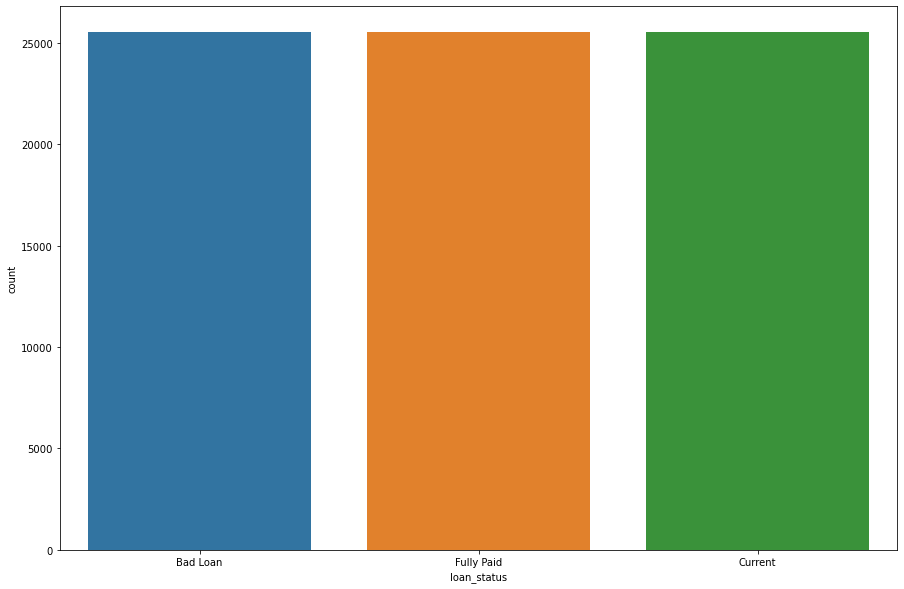

In [209]:
# Data Balancing
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_train_bal, y_train_bal = sm.fit_resample(trained_normalized_df, Y2_train)
plt.figure(figsize=(15, 10))
sns.countplot(x='loan_status', data=y_train_bal.to_frame())
plt.show()

In [210]:
X_train_bal.sample(3)

,loan_amnt,int_rate,term,installment,annual_inc,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,...,tax_liens,missing_term,remaining_term,application_type,hardship_flag,initial_list_status,home_ownership,grade,purpose,verification_status
51184,0.119697,1.496210e-06,0.000449,0.003171,0.897726,0.000035,0.0,0.0,0.000007,0.000000,...,0.0,0.0,0.000232,0.0,1.0,0.0,1.0,2.0,1.0,2.0
29005,0.126153,8.477503e-07,0.000454,0.003879,0.946150,0.000050,0.0,0.0,0.000013,0.000013,...,0.0,0.0,0.000000,1.0,1.0,0.0,1.0,3.0,1.0,1.0
12413,0.024691,1.454682e-07,0.000074,0.000763,0.123453,0.000011,0.0,0.0,0.000002,0.000002,...,0.0,0.0,0.000000,1.0,1.0,1.0,2.0,3.0,1.0,1.0


In [62]:
# Model Applying With PCA(), Pipeline()

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier

estimators = [("PCA", PCA()), ("clf", AdaBoostClassifier())]

pipe = Pipeline(estimators)
print(pipe)

#we can use a pipeline like a classifier or transformer.
pipe.fit(X_train_bal, y_train_bal)
y_train_preds = pipe.predict(X_train_bal)
y_preds = pipe.predict(test_normalized_df)

# from sklearn.metrics import accuracy_score

# accuracy = accuracy_score(y_test, y_preds)
# print(accuracy)

Pipeline(steps=[('PCA', PCA()), ('clf', AdaBoostClassifier())])


In [74]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train_bal, y_train_preds)
accuracy = accuracy_score(y_test, y_preds)
print(train_accuracy, accuracy)

0.8650526260805975 0.8471358216692587


[[1830  181  122]
 [ 312 5233  906]
 [ 131  707 6010]]
15432 15432 15432


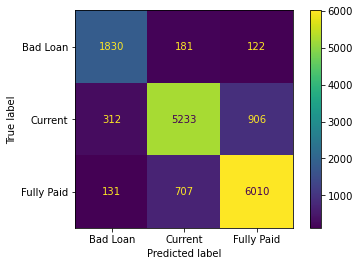

In [64]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
conf_mat = confusion_matrix(y_test, y_preds)
print(conf_mat)
plot_confusion_matrix(pipe, test_normalized_df, y_test )

{'PCA': 'passthrough', 'clf__C': 100}
0.9521124935199585


In [ ]:
# Decision Tree Grid Pipe

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

tree_estimators = Pipeline([("PCA", PCA()), ("Dec_tree", DecisionTreeClassifier())])
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10]
parameters = dict(PCA__n_components=[10, 20],
                      Dec_tree__criterion=criterion,
                      Dec_tree__max_depth=max_depth)
tree_grid = GridSearchCV(tree_estimators, parameters)
tree_grid.fit(X_train_bal, y_train_bal)

In [79]:
print(tree_grid.best_params_)
#collect predictions on test data
y_d_tree_train_preds = tree_grid.predict(X_train_bal)
y_d_tree_preds = tree_grid.predict(test_normalized_df)


#calculate the score - accuracy / error or other metrics.
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_d_tree_preds)
print(accuracy)

{'Dec_tree__criterion': 'gini', 'Dec_tree__max_depth': 10, 'PCA__n_components': 20}
0.8227060653188181


In [ ]:
# Confusion Matrix for Decision Tree GRID

[[1668  263  202]
 [  54 5188 1209]
 [ 108  900 5840]]


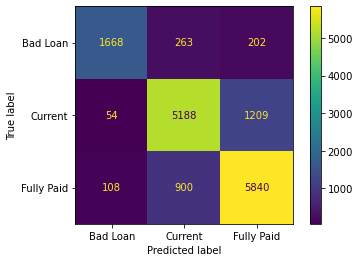

In [80]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
conf_mat = confusion_matrix(y_test, y_d_tree_preds)
print(conf_mat)
plot_confusion_matrix(tree_grid, test_normalized_df, y_test )

In [ ]:
# Random Forest Grid Pipe

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

random_for_estimators = Pipeline([("PCA", PCA()), ("Random_Forest", RandomForestClassifier(random_state=1))])

parameters = dict(PCA__n_components=[10, 20],
                      Random_Forest__n_estimators=[20, 30],
                      Random_Forest__max_features=['auto', 'sqrt', 'log2'],
                      Random_Forest__max_depth=[2,4,6,8,10],
                      Random_Forest__criterion=['gini', 'entropy'])
random_forest_grid = GridSearchCV(random_for_estimators, parameters)
random_forest_grid.fit(X_train_bal, y_train_bal)

In [ ]:
print(random_forest_grid.best_params_)
#collect predictions on test data
y_random_forest_train_preds = random_forest_grid.predict(X_train_bal)
y_random_forest_test_preds = random_forest_grid.predict(test_normalized_df)


#calculate the score - accuracy / error or other metrics.
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_random_forest_test_preds)
print(accuracy)

In [ ]:
# Adaboost Grid Pipe

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline

adaboost_estimators = Pipeline([("PCA", PCA()), ("adaboost", AdaBoostClassifier(random_state=1))])

parameters = dict(PCA__n_components=[10, 20],
                      adaboost__n_estimators=[50, 60, 70],
                      adaboost__learning_rate=[1, 2, 3],)
adaboost_grid = GridSearchCV(adaboost_estimators, parameters)
adaboost_grid.fit(X_train_bal, y_train_bal)

In [ ]:
print(adaboost_grid.best_params_)
#collect predictions on test data
y_adaboost_train_preds = adaboost_grid.predict(X_train_bal)
y_adaboost_test_preds = adaboost_grid.predict(test_normalized_df)

#calculate the score - accuracy / error or other metrics.
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_adaboost_test_preds)
print(accuracy)

In [ ]:
# Model Applying with Correlation

In [211]:
train_df_for_corr = X_train_bal.copy()
corr = train_df_for_corr.corr()
corr

,loan_amnt,int_rate,term,installment,annual_inc,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,...,tax_liens,missing_term,remaining_term,application_type,hardship_flag,initial_list_status,home_ownership,grade,purpose,verification_status
loan_amnt,1.000000,0.542250,0.641901,0.964253,0.500209,0.160796,0.065831,0.095078,0.184261,0.164486,...,0.033793,0.089441,0.287408,-0.087156,-0.024773,-0.022731,-0.207878,-0.044299,-0.046078,-0.014434
int_rate,0.542250,1.000000,0.888079,0.604219,0.516385,0.238093,0.140383,0.276007,0.416807,0.382052,...,0.040392,0.117085,0.204260,0.030449,0.002758,0.113654,-0.228337,-0.008460,0.014912,-0.023435
term,0.641901,0.888079,1.000000,0.623699,0.594988,0.261454,0.128425,0.227504,0.368045,0.325049,...,0.043718,0.135411,0.348180,0.024545,-0.007469,0.011230,-0.248039,-0.051222,0.030649,0.001726
installment,0.964253,0.604219,0.623699,1.000000,0.521156,0.172437,0.079967,0.123549,0.219303,0.200494,...,0.037566,0.088728,0.185853,-0.063856,-0.017222,0.040934,-0.221790,-0.005145,-0.042721,-0.013498
annual_inc,0.500209,0.516385,0.594988,0.521156,1.000000,0.046721,0.130482,0.194252,0.284594,0.244038,...,0.079804,0.090326,0.151215,0.230276,-0.017545,0.033345,-0.321387,-0.011366,0.064005,0.140555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
initial_list_status,-0.022731,0.113654,0.011230,0.040934,0.033345,0.014957,0.016262,0.045856,0.054340,0.055639,...,0.014953,-0.008185,-0.110131,0.055262,0.022083,1.000000,-0.026007,0.038259,0.009521,-0.023483
home_ownership,-0.207878,-0.228337,-0.248039,-0.221790,-0.321387,-0.051025,-0.038777,-0.080085,-0.113048,-0.095205,...,-0.018357,-0.044852,-0.052934,-0.076619,0.019346,-0.026007,1.000000,0.013063,-0.026469,-0.043147
grade,-0.044299,-0.008460,-0.051222,-0.005145,-0.011366,-0.018856,-0.006968,-0.031003,-0.038995,-0.025516,...,-0.015558,-0.018533,-0.063908,0.018410,0.012655,0.038259,0.013063,1.000000,0.023451,0.001624
purpose,-0.046078,0.014912,0.030649,-0.042721,0.064005,-0.015390,0.003726,0.002683,0.016810,0.018397,...,-0.003585,0.011298,-0.002480,0.050116,0.001177,0.009521,-0.026469,0.023451,1.000000,0.028664


In [212]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.70:
            if columns[j]:
                columns[j] = False
selected_columns = train_df_for_corr.columns[columns]

In [213]:
selected_columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_fi',
       'inq_last_12m', 'inq_last_6mths', 'mort_acc', 'open_acc', 'open_acc_6m',
       'pub_rec', 'out_prncp', 'total_rec_late_fee', 'total_cu_tl',
       'tot_coll_amt', 'tot_cur_bal', 'total_bal_il', 'total_rev_hi_lim',
       'mths_since_recent_bc', 'mths_since_recent_inq', 'mths_since_rcnt_il',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'open_act_il',
       'open_il_12m', 'max_bal_bc', 'avg_cur_bal', 'recoveries',
       'chargeoff_within_12_mths', 'collections_12_mths_ex_med',
       'num_accts_ever_120_pd', 'num_il_tl', 'num_tl_90g_dpd_24m', 'tax_liens',
       'missing_term', 'application_type', 'hardship_flag',
       'initial_list_status', 'home_ownership', 'grade', 'purpose',
       'verification_status'],
      dtype='object')

In [214]:
less_correlated_df = train_df_for_corr[selected_columns]
less_correlated_test_df = test_normalized_df[selected_columns]
less_correlated_df.shape

(76578, 43)

In [215]:
# Decision Tree with COrrelation
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

d_tree_clf = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10]
parameters = {
    "criterion" : ['gini', 'entropy'],
    "max_depth": [2,4,6,8,10]
}
d_tree_clf_grid = GridSearchCV(d_tree_clf, parameters)
d_tree_clf_grid.fit(less_correlated_df, y_train_bal)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10]})

In [216]:
d_tree_clf_preds = d_tree_clf_grid.predict(less_correlated_test_df)
#calculate the score - accuracy / error or other metrics.
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, d_tree_clf_preds)
print(accuracy)

0.9455676516329704


In [217]:
# Random Forest with Correlation

In [218]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier()
parameters = {
    "criterion" : ['gini', 'entropy'],
    "max_depth": [6,8],
    "n_estimators": [20, 30],
    "max_features": ['auto']
}
random_forest_clf_grid = GridSearchCV(random_forest_clf, parameters)
random_forest_clf_grid.fit(less_correlated_df, y_train_bal)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [6, 8],
                         'max_features': ['auto'], 'n_estimators': [20, 30]})

In [219]:
random_forest_clf_preds = random_forest_clf_grid.predict(less_correlated_test_df)
#calculate the score - accuracy / error or other metrics.
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, random_forest_clf_preds)
print(accuracy)

0.937402799377916


In [72]:
# Adaboost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier()
parameters = {
    "learning_rate": [1, 2],
    "n_estimators": [20, 30]
}
adaboost_clf_grid = GridSearchCV(adaboost_clf, parameters)
adaboost_clf_grid.fit(less_correlated_df, y_train_bal)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1, 2], 'n_estimators': [20, 30]})

In [73]:
adaboost_clf_preds = adaboost_clf_grid.predict(less_correlated_test_df)
#calculate the score - accuracy / error or other metrics.
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, adaboost_clf_preds)
print(accuracy)

0.9312467599792639


[[1339  229  565]
 [ 100 6267   84]
 [  80    3 6765]]
Adaboost Matrix
(0.9298536220042107, 0.9312467599792639, 0.9269322266502353, None)
[[1345  184  604]
 [   6 6347   98]
 [  17    0 6831]]
Random Forest
(0.9445455643804732, 0.9410964230171073, 0.9365218891436469, None)
[[1448  108  577]
 [  21 6347   83]
 [  48    0 6800]]
Decision Tree
(0.947459385659703, 0.9457620528771384, 0.9426224330186951, None)


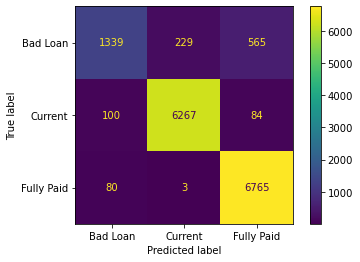

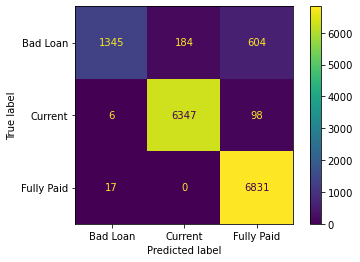

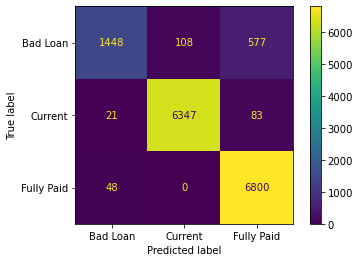

In [74]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_recall_fscore_support
classifiers = [
    {"name": "Adaboost Matrix" ,"model": adaboost_clf_grid, "preds": adaboost_clf_preds}, 
    {"name": "Random Forest" ,"model": random_forest_clf_grid, "preds": random_forest_clf_preds},
    {"name": "Decision Tree" ,"model": d_tree_clf_grid, "preds": d_tree_clf_preds}, 
    ]
for i in classifiers:
    conf_mat = confusion_matrix(y_test, i["preds"])
    print(conf_mat)
    print(i["name"])
    print(precision_recall_fscore_support(y_test, i["preds"], average='weighted'))
    plot_confusion_matrix(i["model"], less_correlated_test_df, y_test )
#     print(i["preds"])

In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X_train_bal, y_train_bal, cv=10)
scores

array([0.85374771, 0.85648995, 0.8516584 , 0.86040742, 0.86615304,
       0.8694176 , 0.87085401, 0.86928702, 0.87005355, 0.87514692])

In [87]:
from sklearn.model_selection import StratifiedKFold
accuracy = []
skf = StratifiedKFold(n_splits = 10)
skf.get_n_splits(X, Y)
for train_index, test_index in skf.split(X2_train, Y2_train):
    X1_train, X1_test = X2_train.iloc[train_index], X2_train.iloc[test_index]
    Y1_train, Y1_test = Y2_train.iloc[train_index], Y2_train.iloc[test_index]
    pipe.fit(X1_train, Y1_train)
    predictions = pipe.predict(X1_test)
    score = accuracy_score(predictions, Y1_test)
    accuracy.append(score)

print(accuracy)

[0.9886690647482015, 0.9866906474820144, 0.9852517985611511, 0.9870503597122302, 0.987410071942446, 0.985968699406368, 0.9881273610361576, 0.9884871379744559, 0.9872279186904119, 0.9865083648138154]


In [ ]:
# Cross Validation with Random Forest

In [74]:
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import StratifiedKFold, GridSearchCV
# # from sklearn.preprocessing import StandardScaler

# pipe = Pipeline(
#     [
# #     ('scaler', StandardScaler(copy=True),
#     ('resample', SMOTE()),
#     ('model', RandomForestClassifier())]
# )

# kf = StratifiedKFold(n_splits=5, shuffle=True)


# p_grid = dict(model__n_estimators=[50,100])
# grid_search = GridSearchCV(
#     estimator=pipe, param_grid=p_grid, cv=kf, refit=True
# )
# grid_search.fit(trained_normalized_df, Y2_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('resample', SMOTE()),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__n_estimators': [50, 100]})

In [77]:
print(grid_search.best_params_)
grid_preds = grid_search.predict(trained_normalized_df)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y2_train, grid_preds)
print(accuracy)

{'model__n_estimators': 100}
1.0


In [53]:
categorical_features_of_interest = [
    'emp_title', 
    'application_type', 
    'home_ownership',
    'term',
    'grade',
    'verification_status',
    'purpose',
    'hardship_flag',
    'revol_util',
    'int_rate'
]

import category_encoders as ce
enc = ce.OrdinalEncoder(cols=categorical_features_of_interest, handle_missing='return_nan', return_df= True)

#We now fit the model and transform the data and put it in X which is a dataframe
transformed_loan_df=enc.fit_transform(new_loan_df)
type(transformed_loan_df)

C:\Users\Waqar Ayub\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


pandas.core.frame.DataFrame

In [54]:
remaining_categorical_features = transformed_loan_df.select_dtypes(exclude=[np.number])
print(len(remaining_categorical_features.columns))

6


In [55]:
categorical_columns_to_drop = categorical_features_of_interest
categorical_columns_to_drop.append('loan_status')
dropable_categorical_columns = list(set(transformed_loan_df.columns) - set(categorical_columns_to_drop))
dropable_categorical_columns = transformed_loan_df[dropable_categorical_columns].select_dtypes(exclude=[np.number]).columns
dropable_categorical_columns

Index(['issue_d', 'next_pymnt_d', 'pymnt_plan', 'earliest_cr_line',
       'last_pymnt_d'],
      dtype='object')

In [56]:
encoded_loan_df = transformed_loan_df.drop(dropable_categorical_columns, axis=1)
# encoded_loan_df.info(verbose=True)

In [57]:
Y= encoded_loan_df['loan_status']
X= encoded_loan_df.drop(['loan_status'],axis = 1)
# print(Y.sample(3))
# print(X.info(verbose=True))

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

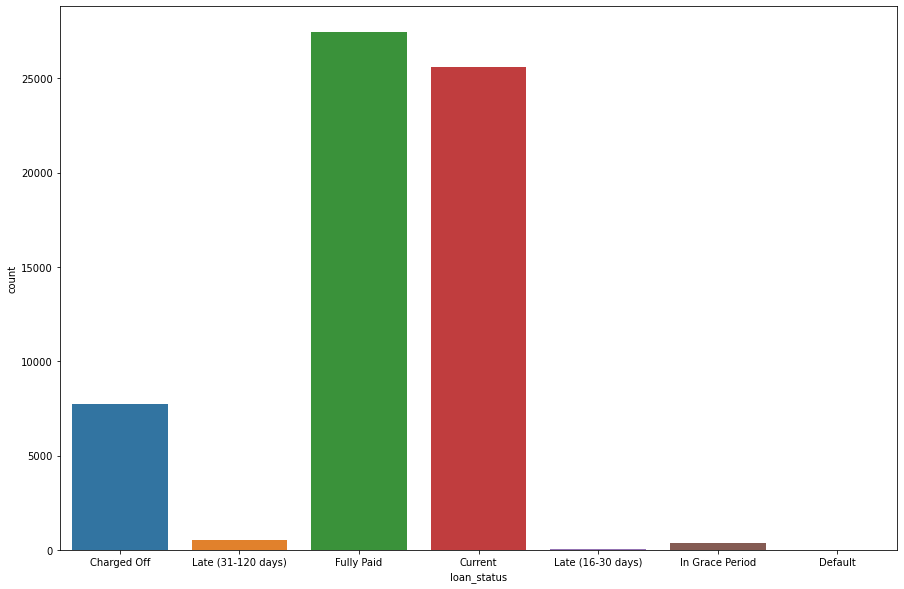

In [59]:
plt.figure(figsize=(15, 10))
sns.countplot(x='loan_status', data=y_train.to_frame())
plt.show()

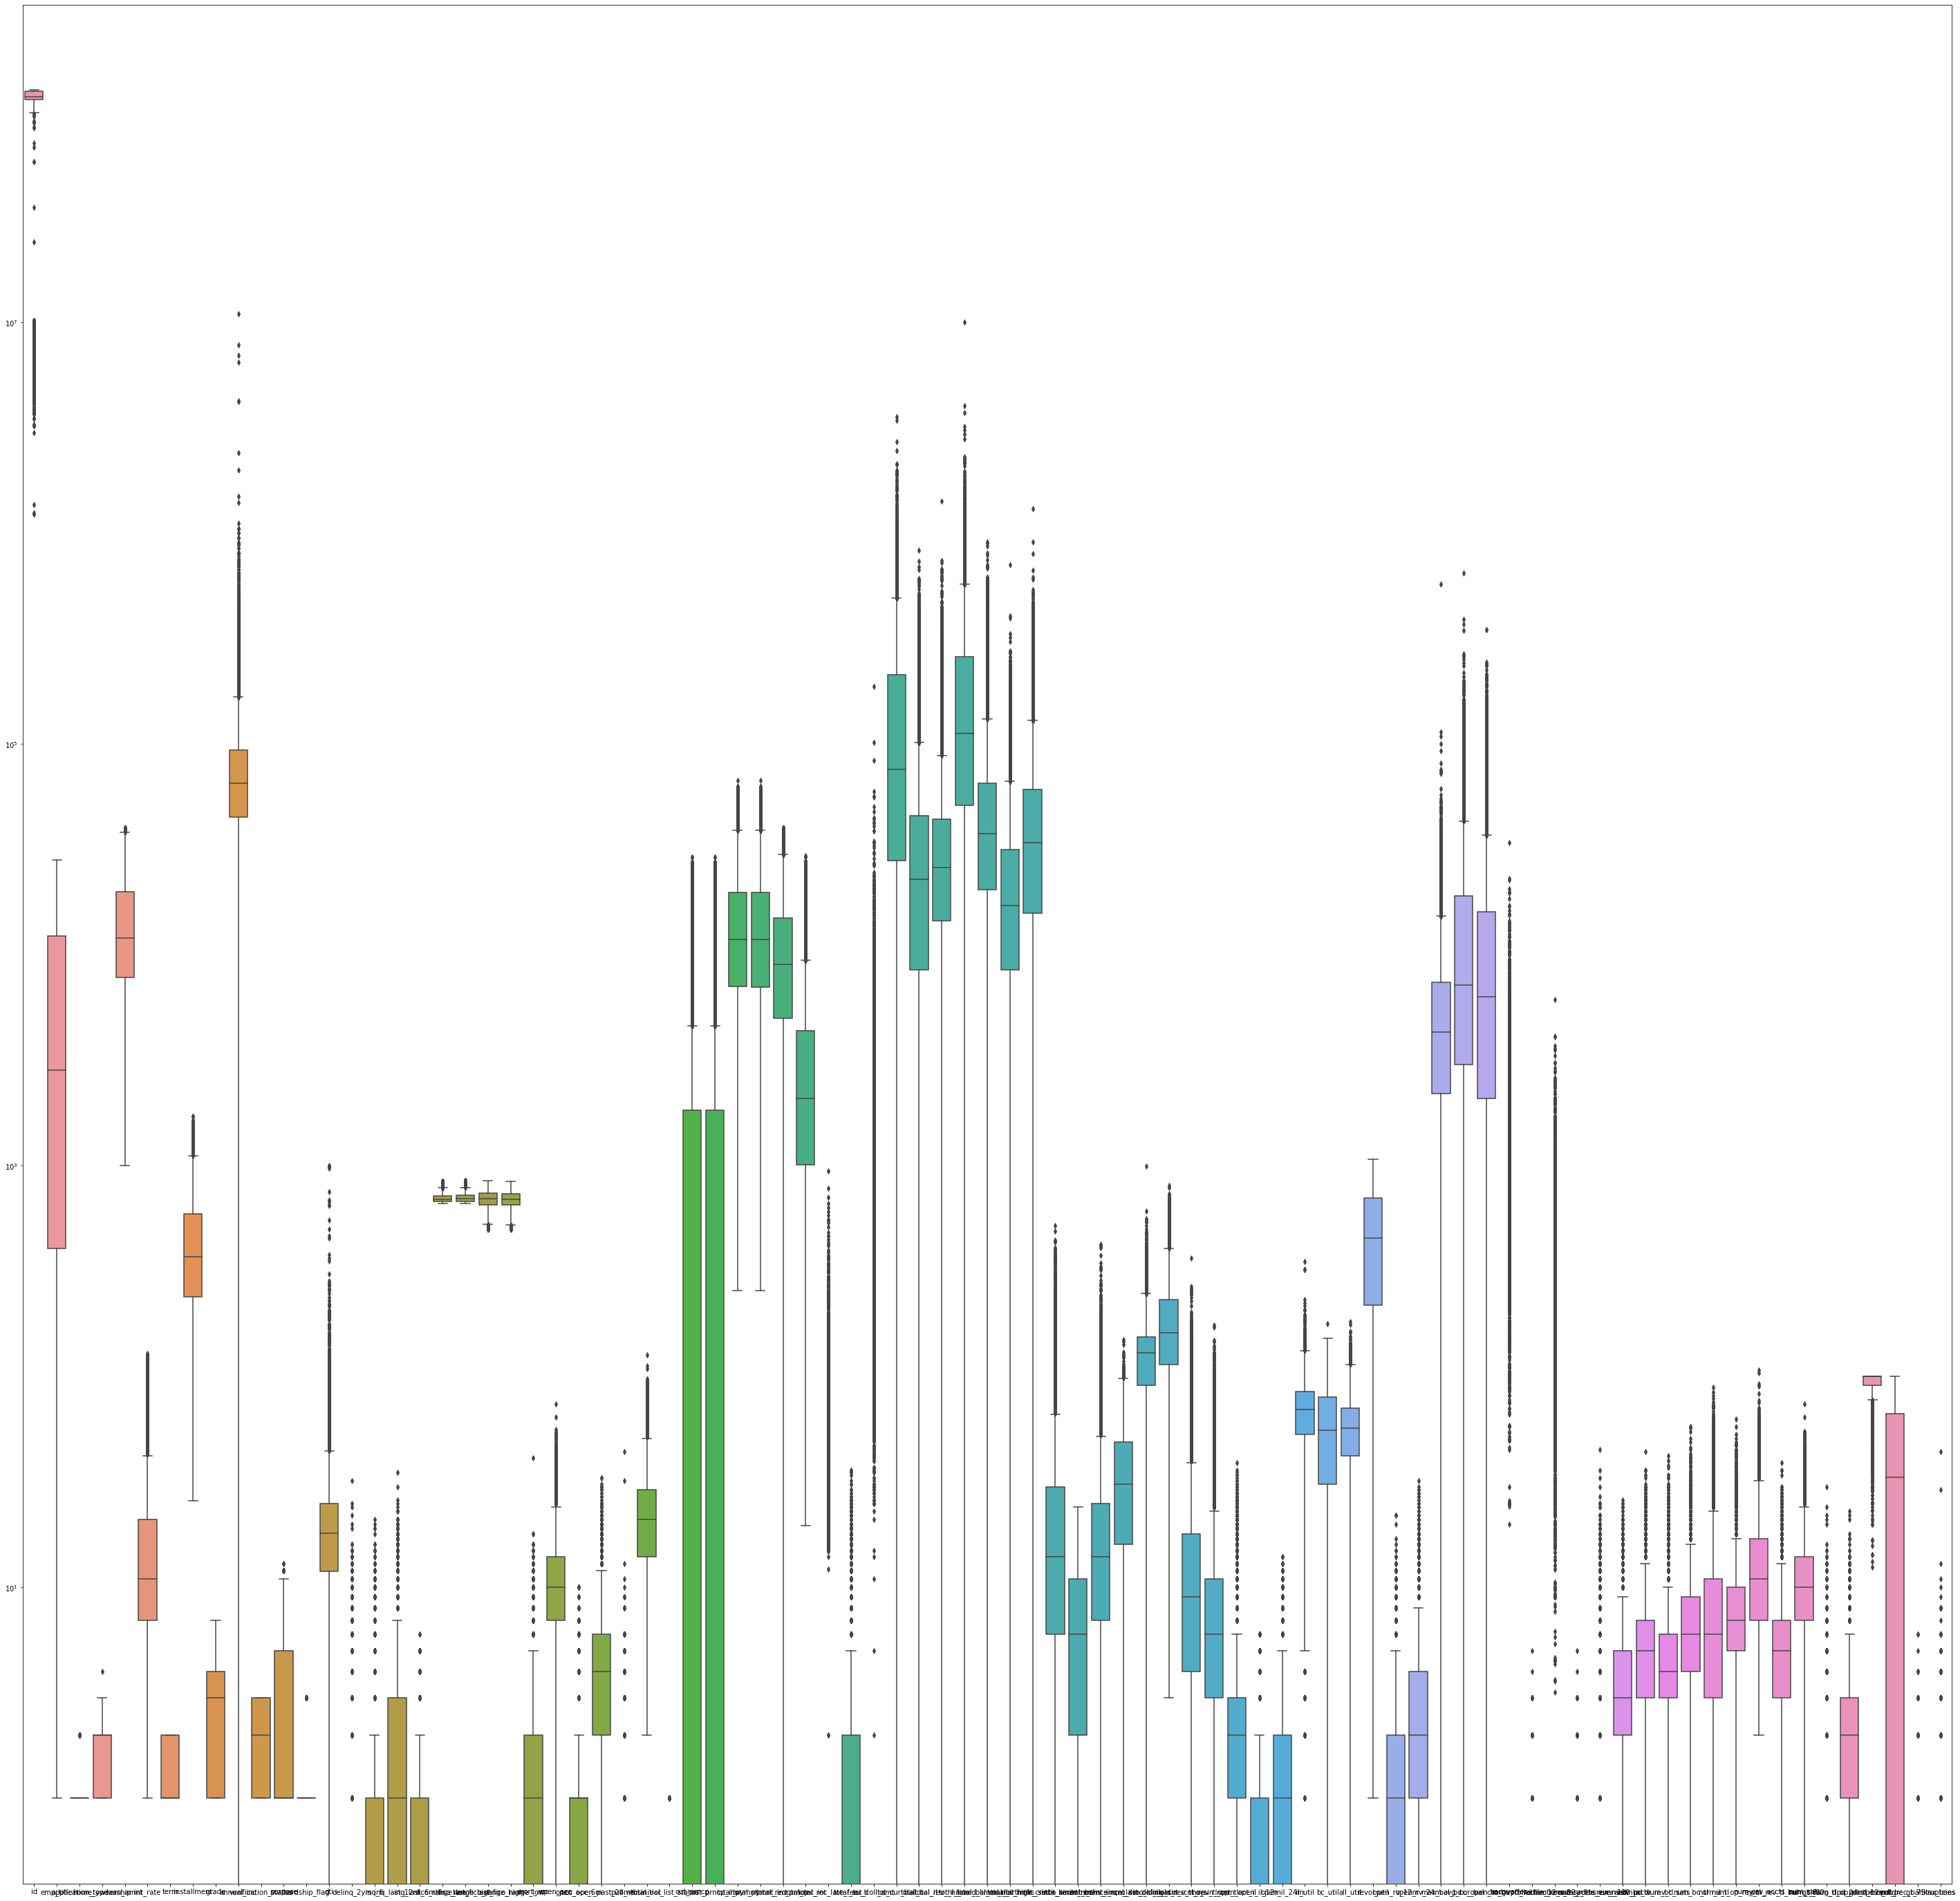

In [60]:
plt.figure(figsize=(50, 50))
sns.boxplot(data=X_train).set(yscale="log")
plt.show()

id


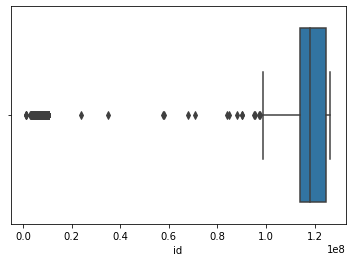

emp_title


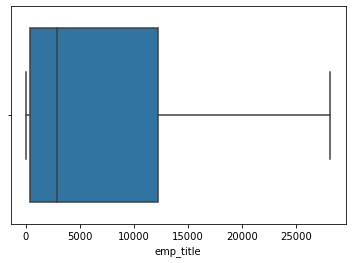

application_type


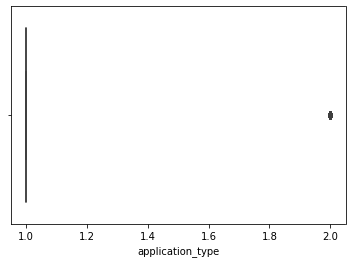

home_ownership


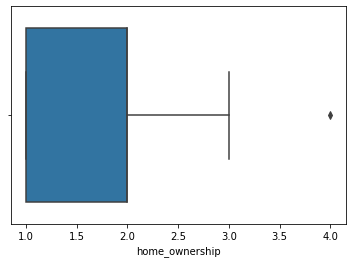

loan_amnt


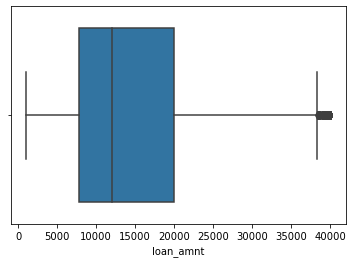

int_rate


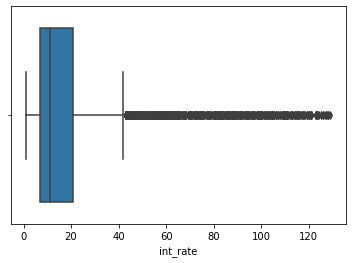

term


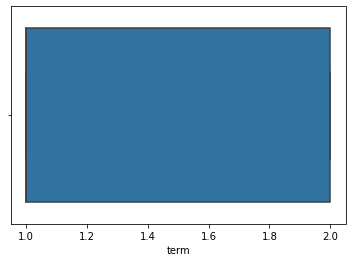

installment


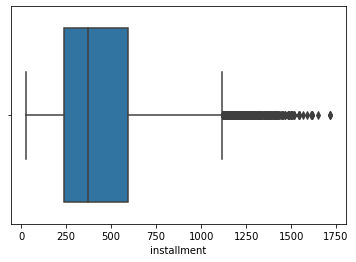

grade


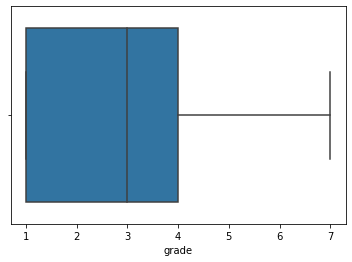

annual_inc


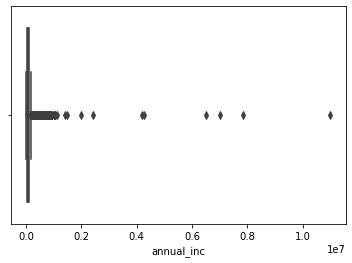

verification_status


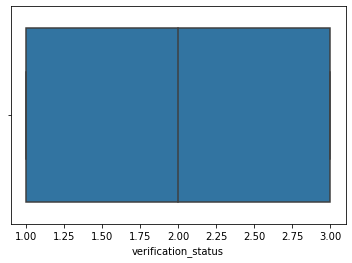

purpose


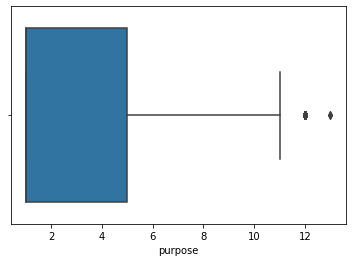

hardship_flag


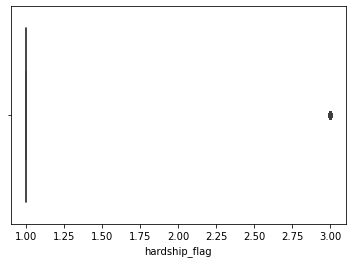

dti


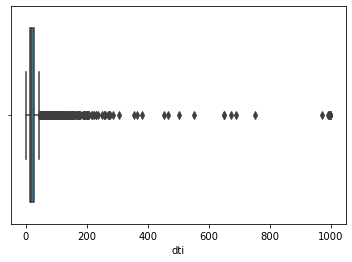

delinq_2yrs


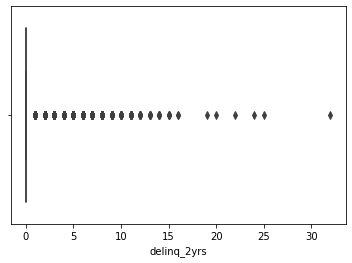

inq_fi


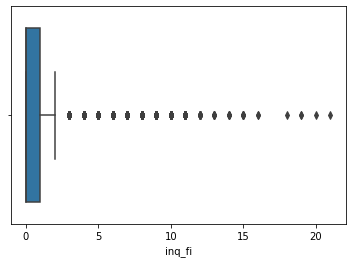

inq_last_12m


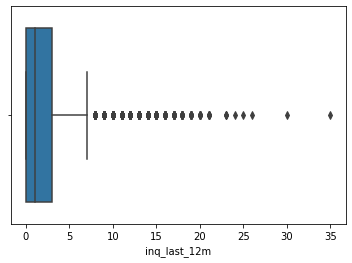

inq_last_6mths


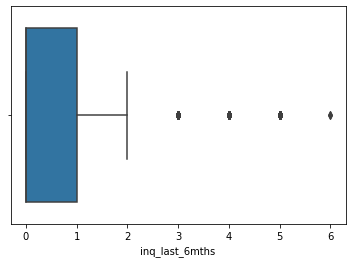

fico_range_low


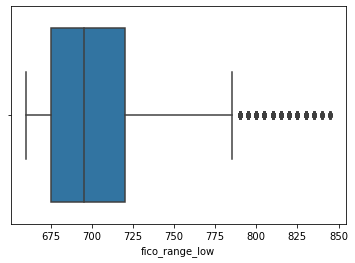

fico_range_high


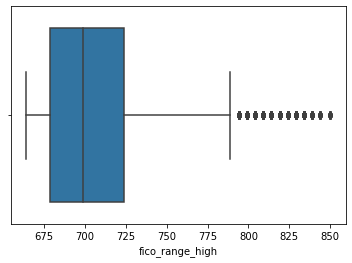

last_fico_range_high


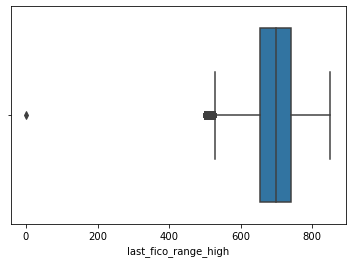

last_fico_range_low


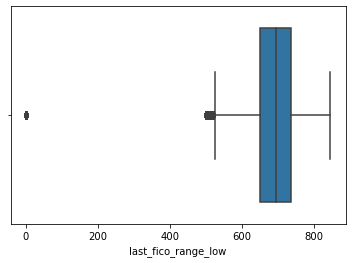

mort_acc


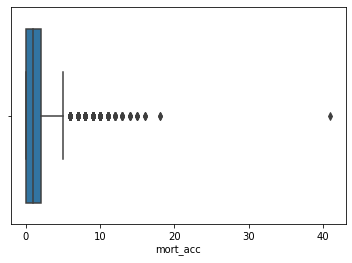

open_acc


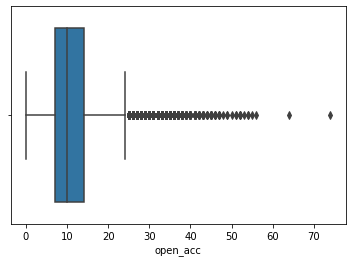

open_acc_6m


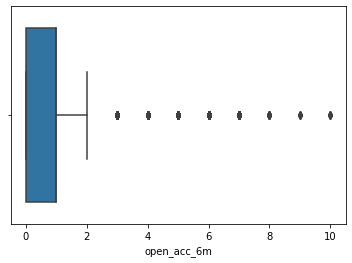

acc_open_past_24mths


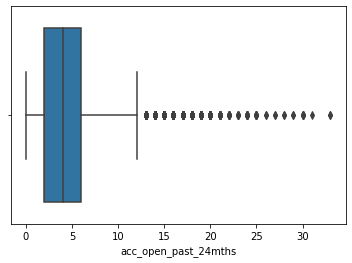

pub_rec


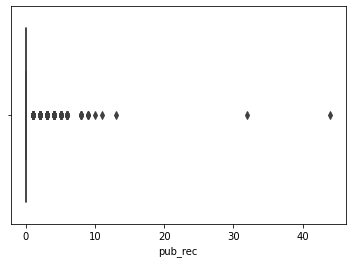

total_acc


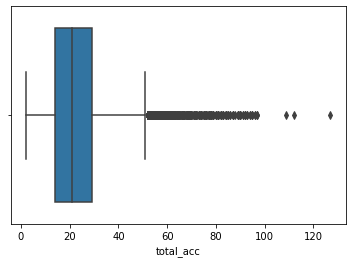

initial_list_status


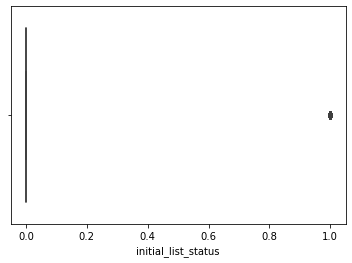

out_prncp


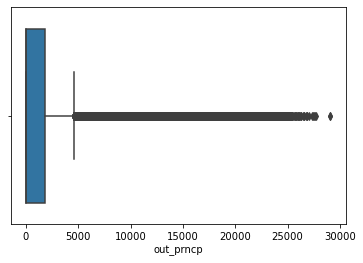

out_prncp_inv


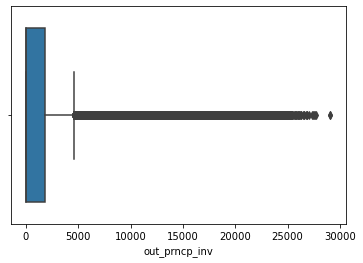

total_pymnt


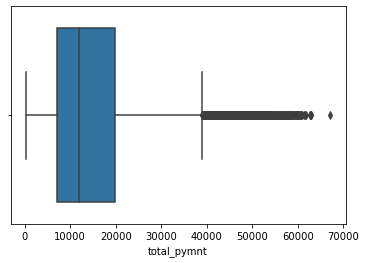

total_pymnt_inv


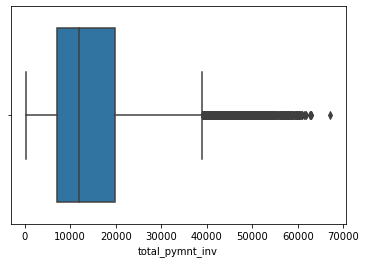

total_rec_prncp


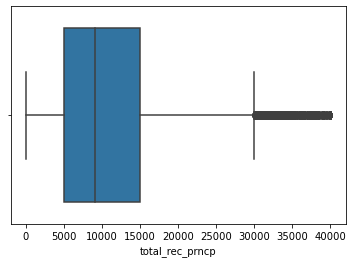

total_rec_int


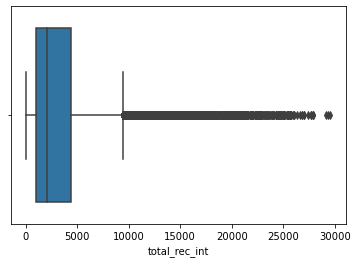

total_rec_late_fee


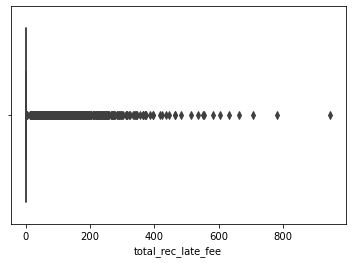

total_cu_tl


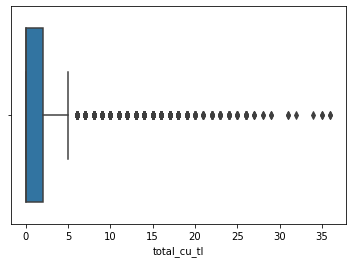

tot_coll_amt


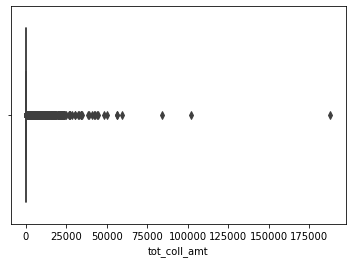

tot_cur_bal


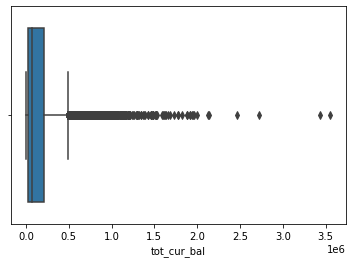

total_bal_il


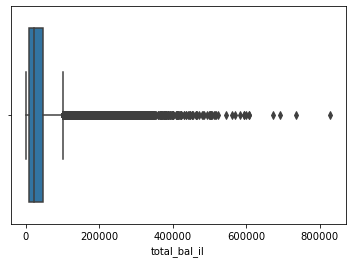

total_rev_hi_lim


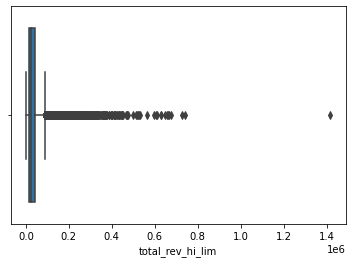

tot_hi_cred_lim


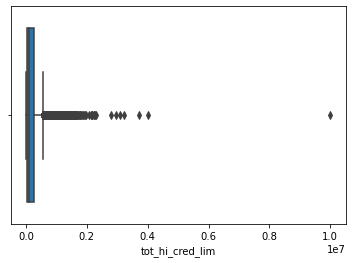

total_bal_ex_mort


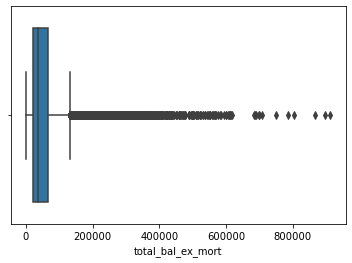

total_bc_limit


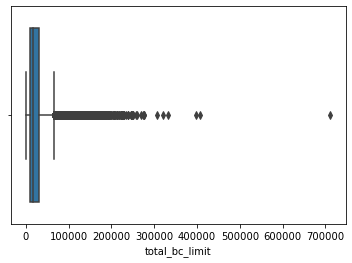

total_il_high_credit_limit


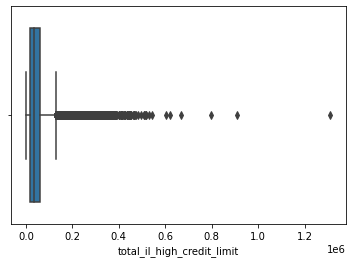

mths_since_recent_bc


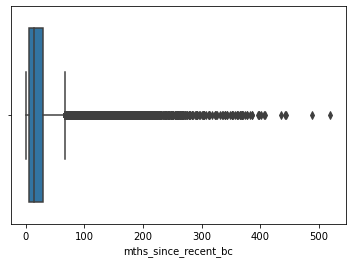

mths_since_recent_inq


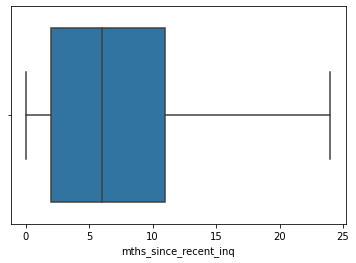

mths_since_rcnt_il


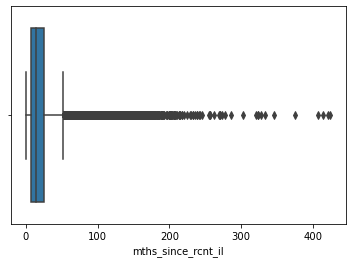

mths_since_last_delinq


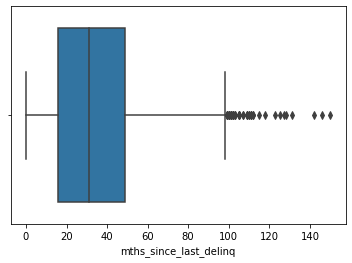

mo_sin_old_il_acct


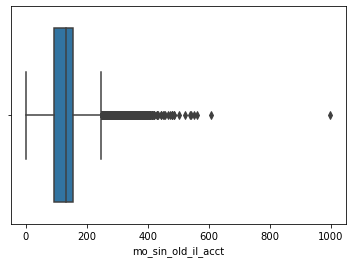

mo_sin_old_rev_tl_op


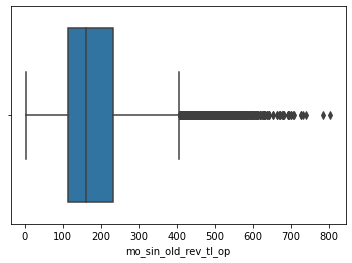

mo_sin_rcnt_rev_tl_op


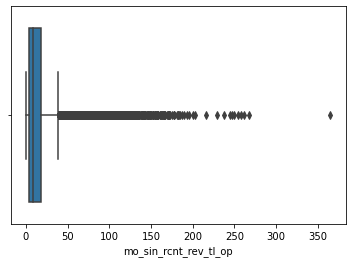

mo_sin_rcnt_tl


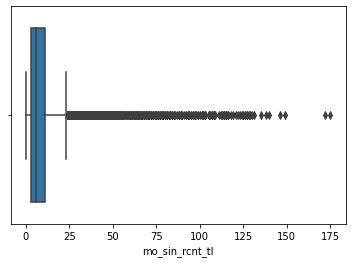

open_act_il


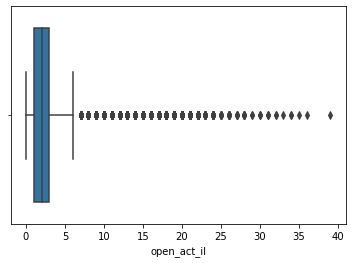

open_il_12m


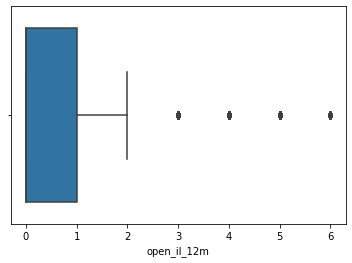

open_il_24m


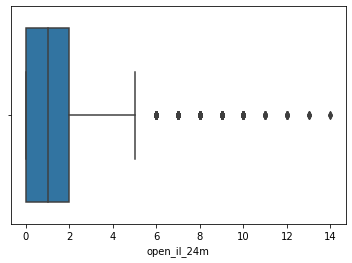

il_util


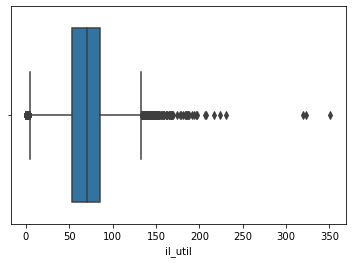

bc_util


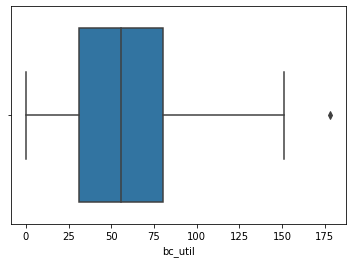

all_util


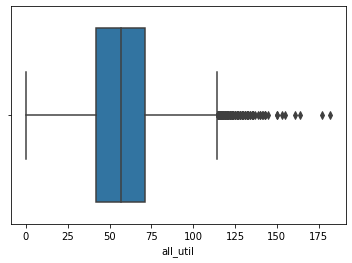

revol_util


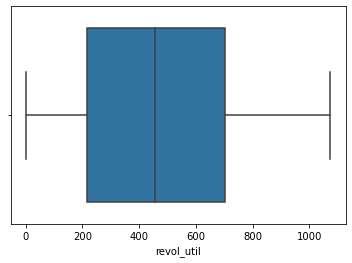

open_rv_12m


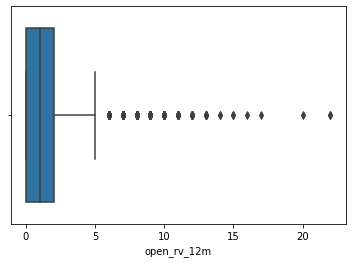

open_rv_24m


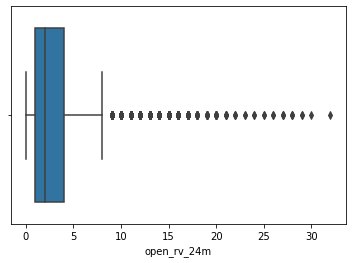

max_bal_bc


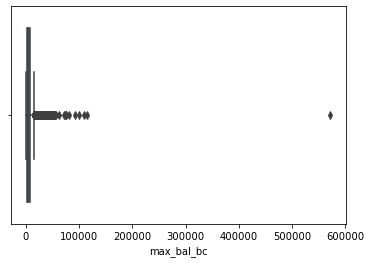

avg_cur_bal


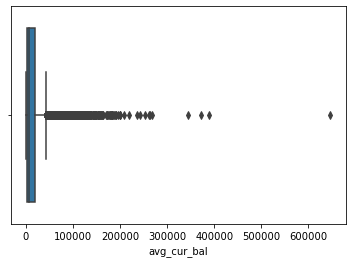

bc_open_to_buy


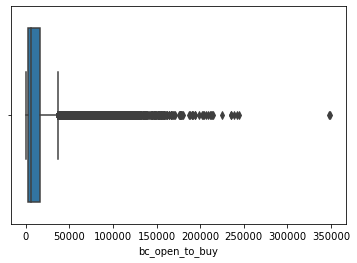

recoveries


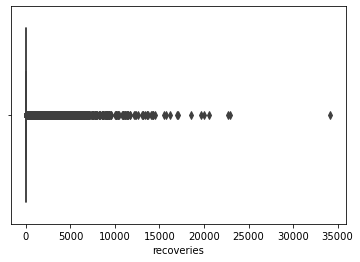

chargeoff_within_12_mths


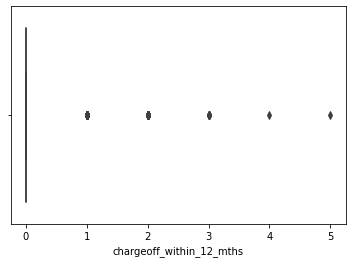

collection_recovery_fee


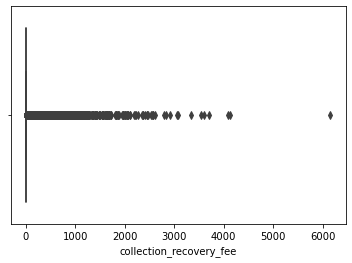

collections_12_mths_ex_med


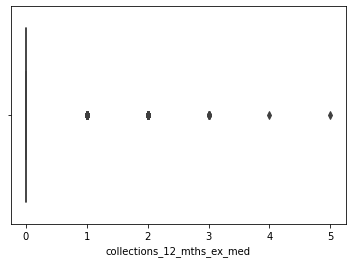

num_accts_ever_120_pd


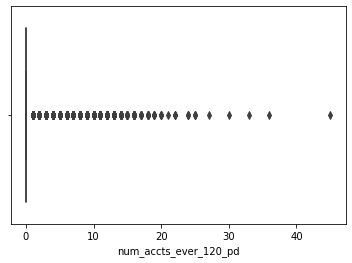

num_actv_bc_tl


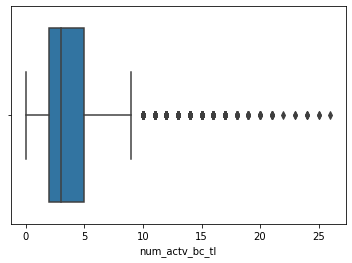

num_actv_rev_tl


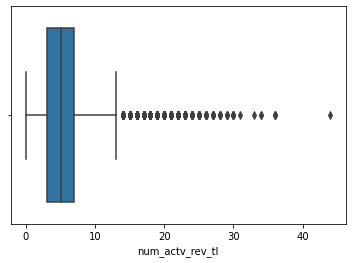

num_bc_sats


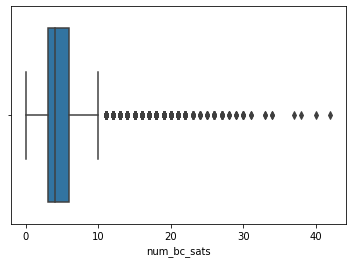

num_bc_tl


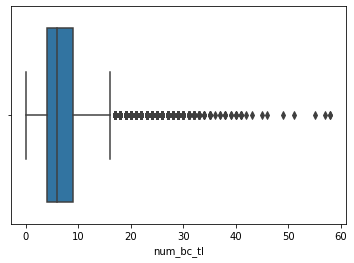

num_il_tl


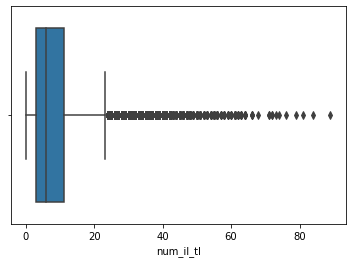

num_op_rev_tl


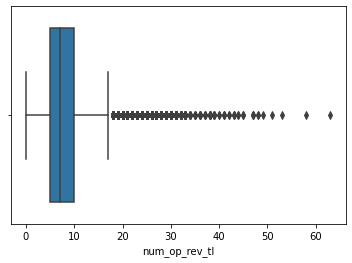

num_rev_accts


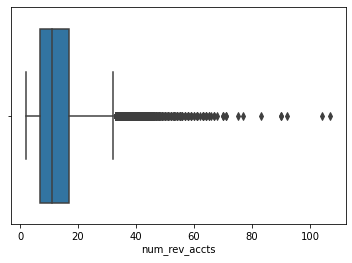

num_rev_tl_bal_gt_0


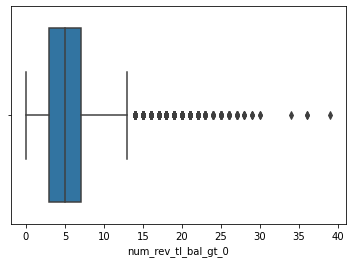

num_sats


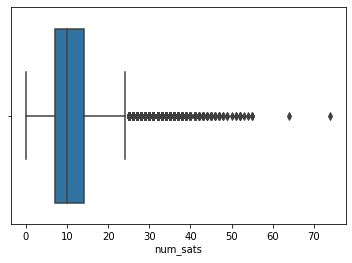

num_tl_90g_dpd_24m


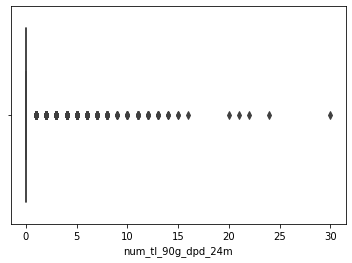

num_tl_op_past_12m


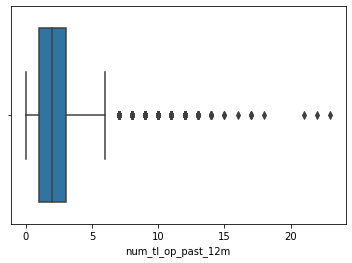

pct_tl_nvr_dlq


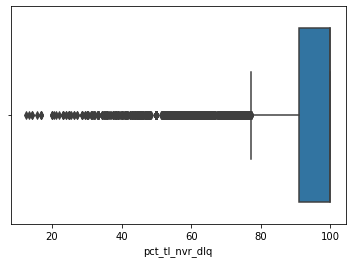

percent_bc_gt_75


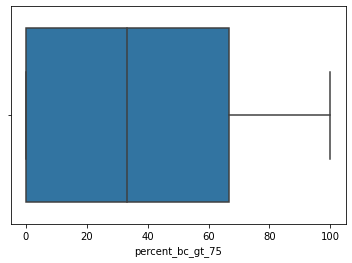

pub_rec_bankruptcies


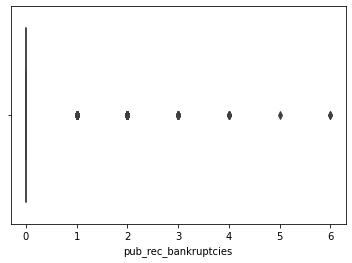

tax_liens


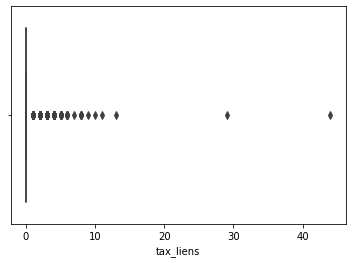

In [61]:
for feature in X_train:
    print(feature)
    sns.boxplot(x=feature, data=X_train)
    plt.show()

In [62]:
#print(X_train.isna().sum())
for i in X_train:
    print(i, X_train[i].isna().sum())

id 0
emp_title 4726
application_type 0
home_ownership 0
loan_amnt 0
int_rate 0
term 0
installment 0
grade 0
annual_inc 0
verification_status 0
purpose 0
hardship_flag 1299
dti 81
delinq_2yrs 0
inq_fi 1999
inq_last_12m 1999
inq_last_6mths 0
fico_range_low 0
fico_range_high 0
last_fico_range_high 0
last_fico_range_low 0
mort_acc 0
open_acc 0
open_acc_6m 1999
acc_open_past_24mths 0
pub_rec 0
total_acc 0
initial_list_status 0
out_prncp 0
out_prncp_inv 0
total_pymnt 0
total_pymnt_inv 0
total_rec_prncp 0
total_rec_int 0
total_rec_late_fee 0
total_cu_tl 1999
tot_coll_amt 0
tot_cur_bal 0
total_bal_il 1999
total_rev_hi_lim 0
tot_hi_cred_lim 0
total_bal_ex_mort 0
total_bc_limit 0
total_il_high_credit_limit 0
mths_since_recent_bc 857
mths_since_recent_inq 7414
mths_since_rcnt_il 3905
mths_since_last_delinq 31760
mo_sin_old_il_acct 1951
mo_sin_old_rev_tl_op 0
mo_sin_rcnt_rev_tl_op 0
mo_sin_rcnt_tl 0
open_act_il 1999
open_il_12m 1999
open_il_24m 1999
il_util 10580
bc_util 946
all_util 2014
revol_ut

In [63]:
X_train.describe()

,id,emp_title,application_type,home_ownership,loan_amnt,int_rate,term,installment,grade,annual_inc,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
count,6.172700e+04,57001.000000,61727.000000,61727.000000,61727.000000,61727.000000,61727.000000,61727.000000,61727.000000,6.172700e+04,...,61727.000000,61727.000000,61727.000000,61727.000000,61727.000000,61727.000000,61723.000000,60808.000000,61727.000000,61727.000000
mean,1.152615e+08,7034.572499,1.121357,1.717417,15151.520404,15.112107,1.315502,443.036455,2.680448,7.843127e+04,...,8.024333,12.975732,5.374196,11.439662,0.086559,1.953213,93.780333,38.400481,0.128372,0.039739
std,2.033732e+07,8289.984824,0.326544,0.661276,9752.390840,14.658610,0.464719,280.177288,1.433623,9.016921e+04,...,4.754862,7.790406,3.286360,5.746761,0.554932,1.775371,9.738220,36.260274,0.347150,0.367567
min,1.227221e+06,1.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,25.860000,1.000000,0.000000e+00,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,12.500000,0.000000,0.000000,0.000000
25%,1.141648e+08,405.000000,1.000000,1.000000,7800.000000,7.000000,1.000000,239.520000,1.000000,4.500000e+04,...,5.000000,7.000000,3.000000,7.000000,0.000000,1.000000,90.900000,0.000000,0.000000,0.000000
50%,1.178802e+08,2836.000000,1.000000,2.000000,12000.000000,11.000000,1.000000,369.000000,3.000000,6.500000e+04,...,7.000000,11.000000,5.000000,10.000000,0.000000,2.000000,100.000000,33.300000,0.000000,0.000000
75%,1.248018e+08,12268.000000,1.000000,2.000000,20000.000000,21.000000,2.000000,590.755000,4.000000,9.400000e+04,...,10.000000,17.000000,7.000000,14.000000,0.000000,3.000000,100.000000,66.700000,0.000000,0.000000
max,1.264174e+08,28186.000000,2.000000,4.000000,40000.000000,129.000000,2.000000,1717.630000,7.000000,1.099920e+07,...,63.000000,107.000000,39.000000,74.000000,30.000000,23.000000,100.000000,100.000000,6.000000,44.000000


In [64]:
corr = X_train.corr()
corr
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)w
plt.show()

SyntaxError: invalid syntax (<ipython-input-64-9a3d517cce0e>, line 4)

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False
selected_columns = X_train.columns[columns]
# data = X_train[selected_columns]
print(len(selected_columns))
print(selected_columns)

In [ ]:
def quntile_check(feature):
    df = X_train.sort_values([feature], ascending=True)
    q3, q1 = np.percentile(df[feature], [75 ,25])
    iqr = q3 - q1
    iqr
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    outliers = X_train[(X_train[feature] < lower_limit) | (X_train[feature] > upper_limit)]
    # print(outliers.index.tolist())
    # print(outliers.head())
    # print(outliers.tail())
    print('Feature Name::::::::::::', feature)
    print('Total Length :::::::::::', len(X_train))
    print('Impure Length ::::::::::', len(outliers))
    print('Pure Length:::::::::::::', len(X_train[~X_train.index.isin(outliers.index.tolist())]))
    sns.boxplot(x=feature, data=X_train)
    plt.show()
    print('-------------------------------------------------------------------')
    return outliers.index.tolist()
    # print(X_train[~X_train.index.isin(outliers.index.tolist())])
    # for i in outliers:
    #     print(i)
    #     if (i == 'loan_amnt'):
    #         if ((outliers[i] < lower_limit) | (outliers[i] > upper_limit)):
    #             print(((outliers[i] < lower_limit) | (outliers[i] > upper_limit)))
    # print(outliers.head())
    # print(X_train[!((X_train['loan_amnt'] < lower_limit) | (X_train['loan_amnt'] > upper_limit))])
    # print(iqr, lower_limit, upper_limit)


# uncorrelatedFeature = np.setdiff1d(X_train.columns, selected_columns)
# print(len(uncorrelatedFeature))
featureOutiers = []
for i in X_train:
#     print(i)
    featureOutiers.append(quntile_check(i))
    


In [ ]:
# print(featureOutiers[3])
def unique_values_in_list_of_lists(lst):
    result = set(x for l in lst for x in l)
    return list(result)

values = unique_values_in_list_of_lists(featureOutiers)
print(len(values))
print(len(values) != len(set(values)))

#### CLUSTERING

In [292]:
clustering_df['loan_status'].mask(clustering_df['loan_status'] == 'Late (31-120 days)', 'Bad Loan', inplace=True)
clustering_df['loan_status'].mask(clustering_df['loan_status'] == 'Late (16-30 days)', 'Bad Loan', inplace=True)
clustering_df['loan_status'].mask(clustering_df['loan_status'] == 'In Grace Period', 'Bad Loan', inplace=True)
clustering_df['loan_status'].mask(clustering_df['loan_status'] == 'Charged Off', 'Bad Loan', inplace=True)
clustering_df['loan_status'].mask(clustering_df['loan_status'] == 'Default', 'Bad Loan', inplace=True)
clustering_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77159 entries, 0 to 77158
Data columns (total 91 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          77159 non-null  int64  
 1   emp_title                   71297 non-null  object 
 2   application_type            77159 non-null  object 
 3   home_ownership              77159 non-null  object 
 4   loan_status                 77159 non-null  object 
 5   loan_amnt                   77159 non-null  int64  
 6   int_rate                    77159 non-null  object 
 7   term                        77159 non-null  object 
 8   installment                 77159 non-null  float64
 9   grade                       77159 non-null  object 
 10  earliest_cr_line            77159 non-null  object 
 11  issue_d                     77159 non-null  object 
 12  last_pymnt_d                77159 non-null  object 
 13  next_pymnt_d                332

In [293]:
clustering_df['term'] = [int(str(val).split(' ')[0]) for val in clustering_df['term'].values]
clustering_df['term']

clustering_df['int_rate'] = clustering_df['int_rate'].str.rstrip('%').astype('float') / 100.0
clustering_df['int_rate']

clustering_df['revol_util'] = clustering_df['revol_util'].str.rstrip('%').astype('float') / 100.0
clustering_df['revol_util']

0        0.563
1        0.435
2        0.097
3        0.869
4        0.242
         ...  
77154    0.770
77155    0.590
77156    0.040
77157    0.727
77158    0.865
Name: revol_util, Length: 77159, dtype: float64

In [294]:
import datetime
import dateutil
from dateutil.rrule import rrule, MONTHLY
for_dates_df = clustering_df.copy()
for_dates_df['remaining_term'] = np.nan
for_dates_df['missing_term'] = np.nan
for_dates_df['next_pymnt_d'].fillna("nan",inplace=True)
for index, i in for_dates_df.iterrows():
    strt_dt = datetime.date(
        int(i['issue_d'].split('/')[2]),
        int(i['issue_d'].split('/')[0]),
        int(i['issue_d'].split('/')[1]))
    a_month = dateutil.relativedelta.relativedelta(months=i['term'])
    date_plus_month = strt_dt + a_month
    nextDate = np.nan
    if i['next_pymnt_d'] != "nan":
        nextDate = datetime.datetime.strptime(i['next_pymnt_d'],"%b-%y").strftime('%Y-%m-%d')
        next_to_date = datetime.date(
        int(nextDate.split('-')[0]),
        int(nextDate.split('-')[1]),
        int(nextDate.split('-')[2]))
        dates = [dt for dt in rrule(MONTHLY, dtstart=next_to_date, until=date_plus_month)]
        for_dates_df.at[index,'remaining_term'] = len(dates)

        last_month_date = datetime.date(
        int(i['last_pymnt_d'].split('/')[2]),
        int(i['last_pymnt_d'].split('/')[0]),
        int(i['last_pymnt_d'].split('/')[1]))
        missingInsdates = [dt for dt in rrule(MONTHLY, dtstart=last_month_date, until=next_to_date)]
        for_dates_df.at[index,'missing_term'] = len(missingInsdates) - 2

In [295]:
for_dates_df["next_pymnt_d"].replace({"nan": np.nan}, inplace=True)
clustering_df['missing_term'] = for_dates_df['missing_term']
clustering_df['remaining_term'] = for_dates_df['remaining_term']
# print(clustering_df[clustering_df['missing_term'] > 1])

In [296]:
clustering_df = clustering_df.drop(['issue_d', 'last_pymnt_d', 'next_pymnt_d'], axis=1)

In [297]:
unnecessary_features = [
    'id', 'emp_title', 'pymnt_plan', 'earliest_cr_line'
]
clustering_df = clustering_df.drop(unnecessary_features, axis=1)

In [298]:
# clustering_df.info()

In [299]:
categorical_features = clustering_df.select_dtypes(exclude=[np.number])
categorical_features.columns

Index(['application_type', 'home_ownership', 'loan_status', 'grade',
       'verification_status', 'purpose', 'hardship_flag',
       'initial_list_status'],
      dtype='object')

In [300]:
numerical_features = clustering_df[clustering_df.columns[~clustering_df.columns.isin(categorical_features.columns)]]
numerical_features.columns

Index(['loan_amnt', 'int_rate', 'term', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_fi', 'inq_last_12m', 'inq_last_6mths',
       'fico_range_low', 'fico_range_high', 'last_fico_range_high',
       'last_fico_range_low', 'mort_acc', 'open_acc', 'open_acc_6m',
       'acc_open_past_24mths', 'pub_rec', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'total_cu_tl', 'tot_coll_amt',
       'tot_cur_bal', 'total_bal_il', 'total_rev_hi_lim', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'mths_since_recent_bc', 'mths_since_recent_inq', 'mths_since_rcnt_il',
       'mths_since_last_delinq', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'il_util', 'bc_util', 'all_util', 'revol_util',
       'open_rv_12m', 'open_rv_24m', 'm

In [301]:
# from sklearn.preprocessing import Normalizer
# scale = Normalizer()
# # print(scale.fit_transform(clustering_df[numerical_features.columns]))
# clustering_df[numerical_features.columns] = scale.fit_transform(clustering_df[numerical_features.columns])
# # clustering_df[numerical_features.columns]
clustering_df

,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,...,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,missing_term,remaining_term
0,Individual,RENT,Fully Paid,35000,0.1505,36,1214.15,C,110000.0,Verified,...,5,7,0,1,80.0,0.0,0,0,NaN,NaN
1,Individual,RENT,Bad Loan,21000,0.1408,60,489.51,C,54000.0,Not Verified,...,5,13,0,1,100.0,33.3,1,0,NaN,NaN
2,Individual,MORTGAGE,Current,20000,0.1408,60,466.20,C,74000.0,Verified,...,7,14,0,2,100.0,18.2,0,0,0.0,26.0
3,Individual,RENT,Fully Paid,16000,0.1903,36,586.74,D,58000.0,Source Verified,...,8,10,0,2,95.7,75.0,1,0,NaN,NaN
4,Individual,MORTGAGE,Fully Paid,24000,0.0890,60,497.04,A,94020.0,Verified,...,4,12,0,1,100.0,0.0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77154,Individual,MORTGAGE,Current,3500,0.1505,36,121.42,C,109000.0,Verified,...,9,14,0,1,100.0,100.0,0,0,0.0,4.0
77155,Individual,MORTGAGE,Current,2000,0.0797,36,62.65,A,180000.0,Not Verified,...,4,9,0,2,100.0,66.7,0,0,0.0,4.0
77156,Individual,RENT,Fully Paid,7000,0.0532,36,210.81,A,148000.0,Not Verified,...,4,8,0,1,100.0,0.0,0,0,NaN,NaN
77157,Individual,OWN,Fully Paid,12800,0.2000,36,475.70,D,55000.0,Source Verified,...,3,16,0,1,94.4,100.0,0,0,NaN,NaN


In [302]:
clustering_df.isna().sum()

application_type            0
home_ownership              0
loan_status                 0
loan_amnt                   0
int_rate                    0
                        ...  
percent_bc_gt_75         1119
pub_rec_bankruptcies        0
tax_liens                   0
missing_term            43903
remaining_term          43903
Length: 86, dtype: int64

In [303]:
# clustering_df['revol_util'] = clustering_df[['revol_util']].fillna(X2_train['revol_util'].mean())
# clustering_df['missing_term'] = clustering_df[['missing_term']].fillna(value=0)
# clustering_df['remaining_term'] = clustering_df[['remaining_term']].fillna(value=0)
# clustering_df['hardship_flag'] = clustering_df[['hardship_flag']].fillna(clustering_df['hardship_flag'].value_counts().idxmax())


cluster_df_copy = clustering_df.copy()
cluster_df_copy['revol_util'] = cluster_df_copy[['revol_util']].fillna(value=0)
cluster_df_copy['missing_term'] = cluster_df_copy[['missing_term']].fillna(value=0)
cluster_df_copy['remaining_term'] = cluster_df_copy[['remaining_term']].fillna(value=0)
cluster_df_copy['hardship_flag'] = cluster_df_copy[['hardship_flag']].fillna(cluster_df_copy['hardship_flag'].value_counts().idxmax())


cluster_df_copy.isna().sum()


application_type           0
home_ownership             0
loan_status                0
loan_amnt                  0
int_rate                   0
                        ... 
percent_bc_gt_75        1119
pub_rec_bankruptcies       0
tax_liens                  0
missing_term               0
remaining_term             0
Length: 86, dtype: int64

In [304]:
for i in cluster_df_copy.columns:
    if cluster_df_copy[i].isna().sum() > 0:
        cluster_df_copy[i] = cluster_df_copy[i].fillna(value=0)

In [305]:
cluster_df_copy.isna().sum()

application_type        0
home_ownership          0
loan_status             0
loan_amnt               0
int_rate                0
                       ..
percent_bc_gt_75        0
pub_rec_bankruptcies    0
tax_liens               0
missing_term            0
remaining_term          0
Length: 86, dtype: int64

In [306]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(
    random_state = 1, 
    bootstrap = True, 
    contamination = 'auto',
    max_features = 5, 
    max_samples = 100, 
    n_estimators = 100, 
    n_jobs = 5
)
cluster_df_for_outliers = cluster_df_copy[cluster_df_copy.columns[~cluster_df_copy.columns.isin(categorical_features.columns)]]
preds = clf.fit_predict(cluster_df_for_outliers)
print(preds)
totalOutliers=0
for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
print("Total number of outliers identified is: ",totalOutliers)

[1 1 1 ... 1 1 1]
Total number of outliers identified is:  6681


In [307]:
cluster_mask = (preds != -1)
print(len(cluster_mask))
filtered_cluster = clustering_df[cluster_mask]
filtered_cluster

77159


,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,...,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,missing_term,remaining_term
0,Individual,RENT,Fully Paid,35000,0.1505,36,1214.15,C,110000.0,Verified,...,5,7,0,1,80.0,0.0,0,0,NaN,NaN
1,Individual,RENT,Bad Loan,21000,0.1408,60,489.51,C,54000.0,Not Verified,...,5,13,0,1,100.0,33.3,1,0,NaN,NaN
2,Individual,MORTGAGE,Current,20000,0.1408,60,466.20,C,74000.0,Verified,...,7,14,0,2,100.0,18.2,0,0,0.0,26.0
3,Individual,RENT,Fully Paid,16000,0.1903,36,586.74,D,58000.0,Source Verified,...,8,10,0,2,95.7,75.0,1,0,NaN,NaN
4,Individual,MORTGAGE,Fully Paid,24000,0.0890,60,497.04,A,94020.0,Verified,...,4,12,0,1,100.0,0.0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77154,Individual,MORTGAGE,Current,3500,0.1505,36,121.42,C,109000.0,Verified,...,9,14,0,1,100.0,100.0,0,0,0.0,4.0
77155,Individual,MORTGAGE,Current,2000,0.0797,36,62.65,A,180000.0,Not Verified,...,4,9,0,2,100.0,66.7,0,0,0.0,4.0
77156,Individual,RENT,Fully Paid,7000,0.0532,36,210.81,A,148000.0,Not Verified,...,4,8,0,1,100.0,0.0,0,0,NaN,NaN
77157,Individual,OWN,Fully Paid,12800,0.2000,36,475.70,D,55000.0,Source Verified,...,3,16,0,1,94.4,100.0,0,0,NaN,NaN


In [308]:
filtered_cluster['revol_util'] = filtered_cluster[['revol_util']].fillna(value=filtered_cluster['revol_util'].mean())
filtered_cluster['missing_term'] = filtered_cluster[['missing_term']].fillna(value=0)
filtered_cluster['remaining_term'] = filtered_cluster[['remaining_term']].fillna(value=0)
filtered_cluster['hardship_flag'] = filtered_cluster[['hardship_flag']].fillna(filtered_cluster['hardship_flag'].value_counts().idxmax())
# filtered_cluster.isna().sum()

<ipython-input-308-7e631b64ceb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cluster['revol_util'] = filtered_cluster[['revol_util']].fillna(value=filtered_cluster['revol_util'].mean())
<ipython-input-308-7e631b64ceb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cluster['missing_term'] = filtered_cluster[['missing_term']].fillna(value=0)
<ipython-input-308-7e631b64ceb9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [309]:
for i in filtered_cluster.columns:
    if filtered_cluster[i].isna().sum() > 0:
        filtered_cluster[i] = filtered_cluster[i].fillna(value=filtered_cluster[i].mean())

<ipython-input-309-274ffdb1db76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cluster[i] = filtered_cluster[i].fillna(value=filtered_cluster[i].mean())


In [310]:
filtered_cluster.isna().sum()

application_type        0
home_ownership          0
loan_status             0
loan_amnt               0
int_rate                0
                       ..
percent_bc_gt_75        0
pub_rec_bankruptcies    0
tax_liens               0
missing_term            0
remaining_term          0
Length: 86, dtype: int64

In [311]:
from sklearn.preprocessing import Normalizer, StandardScaler
scale = Normalizer()
# print(scale.fit_transform(clustering_df[numerical_features.columns]))
filtered_cluster[numerical_features.columns] = scale.fit_transform(filtered_cluster[numerical_features.columns])
# clustering_df[numerical_features.columns]

<ipython-input-311-5cbb2f544b1b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cluster[numerical_features.columns] = scale.fit_transform(filtered_cluster[numerical_features.columns])
C:\Users\Waqar Ayub\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [312]:
filtered_cluster

,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,...,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,missing_term,remaining_term
0,Individual,RENT,Fully Paid,0.229820,9.882250e-07,0.000236,0.007972,C,0.722291,Verified,...,0.000033,0.000046,0.0,0.000007,0.000525,0.000000,0.000000,0.0,0.0,0.000000
1,Individual,RENT,Bad Loan,0.094842,6.358941e-07,0.000271,0.002211,C,0.243880,Not Verified,...,0.000023,0.000059,0.0,0.000005,0.000452,0.000150,0.000005,0.0,0.0,0.000000
2,Individual,MORTGAGE,Current,0.114617,8.069020e-07,0.000344,0.002672,C,0.424082,Verified,...,0.000040,0.000080,0.0,0.000011,0.000573,0.000104,0.000000,0.0,0.0,0.000149
3,Individual,RENT,Fully Paid,0.135611,1.612925e-06,0.000305,0.004973,D,0.491590,Source Verified,...,0.000068,0.000085,0.0,0.000017,0.000811,0.000636,0.000008,0.0,0.0,0.000000
4,Individual,MORTGAGE,Fully Paid,0.040462,1.500452e-07,0.000101,0.000838,A,0.158508,Verified,...,0.000007,0.000020,0.0,0.000002,0.000169,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77154,Individual,MORTGAGE,Current,0.007844,3.372881e-07,0.000081,0.000272,C,0.244282,Verified,...,0.000020,0.000031,0.0,0.000002,0.000224,0.000224,0.000000,0.0,0.0,0.000009
77155,Individual,MORTGAGE,Current,0.003711,1.479008e-07,0.000067,0.000116,A,0.334029,Not Verified,...,0.000007,0.000017,0.0,0.000004,0.000186,0.000124,0.000000,0.0,0.0,0.000007
77156,Individual,RENT,Fully Paid,0.029374,2.232427e-07,0.000151,0.000885,A,0.621051,Not Verified,...,0.000017,0.000034,0.0,0.000004,0.000420,0.000000,0.000000,0.0,0.0,0.000000
77157,Individual,OWN,Fully Paid,0.044881,7.012640e-07,0.000126,0.001668,D,0.192848,Source Verified,...,0.000011,0.000056,0.0,0.000004,0.000331,0.000351,0.000000,0.0,0.0,0.000000


In [313]:
labels_true = filtered_cluster["loan_status"]
# filtered_cluster["loan_status"].unique()
np.unique(labels_true)

array(['Bad Loan', 'Current', 'Fully Paid'], dtype=object)

In [314]:
filtered_cluster = filtered_cluster.drop(['loan_status'], axis = 1)
print(filtered_cluster.columns)
from prince import FAMD
famd = FAMD(n_components=10).fit(filtered_cluster)
famd.row_coordinates(filtered_cluster).head()

Index(['application_type', 'home_ownership', 'loan_amnt', 'int_rate', 'term',
       'installment', 'grade', 'annual_inc', 'verification_status', 'purpose',
       'hardship_flag', 'dti', 'delinq_2yrs', 'inq_fi', 'inq_last_12m',
       'inq_last_6mths', 'fico_range_low', 'fico_range_high',
       'last_fico_range_high', 'last_fico_range_low', 'mort_acc', 'open_acc',
       'open_acc_6m', 'acc_open_past_24mths', 'pub_rec', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'total_cu_tl', 'tot_coll_amt', 'tot_cur_bal',
       'total_bal_il', 'total_rev_hi_lim', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'mths_since_recent_bc', 'mths_since_recent_inq', 'mths_since_rcnt_il',
       'mths_since_last_delinq', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'ope

,0,1,2,3,4,5,6,7,8,9
0,0.584538,0.700730,0.637216,-0.105154,0.463120,-0.674128,0.565879,0.006947,0.384014,-0.549275
1,-0.015067,-0.149401,0.483042,-0.269645,0.899862,-0.538119,0.401530,0.017436,0.258067,0.152710
2,-0.366050,0.396578,0.143434,0.120221,-1.158351,-0.705240,0.442245,0.651959,0.733257,-0.130773
3,1.290336,0.380912,0.250236,-0.687357,0.283564,-0.216544,-0.503363,-0.264925,-0.939644,-0.013711
4,-1.368211,0.134581,0.017053,0.286783,0.451831,-0.636539,0.456133,0.145924,-0.327445,-0.536642


In [315]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=1).fit(famd.row_coordinates(filtered_cluster))
pred = model.labels_
pred

array([2, 2, 1, ..., 1, 1, 1])

In [316]:
for_visualization['cluster_id'] = pred
for_visualization.shape
famd = FAMD(n_components=2).fit(filtered_cluster)
for_visualization = famd.row_coordinates(filtered_cluster)

In [317]:
# for_visualization['cluster_id'] = pred
# for_visualization.shape
for_visualization.shape

(70478, 2)

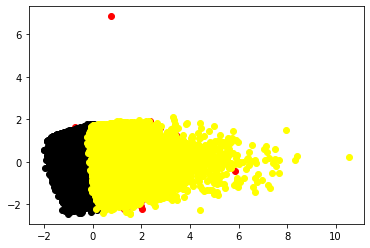

In [318]:
#filter rows of original data
filtered_label0 = for_visualization[model.labels_ == 0]

filtered_label1 = for_visualization[model.labels_ == 1]
filtered_label2 = for_visualization[model.labels_ == 2]
#Plotting the results
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , color = 'red')
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , color = 'black')
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , color = 'yellow')
plt.show()

In [319]:
# 3d Visualization
for_3D_visualization['cluster_id'] = pred
for_3D_visualization.shape
famd = FAMD(n_components=3).fit(filtered_cluster)
for_3D_visualization = famd.row_coordinates(filtered_cluster)

In [320]:
# for_3D_visualization['cluster_id'] = pred
# for_3D_visualization.shape
# True Labels Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoding = le.fit_transform(labels_true)
np.unique(encoding)


array([0, 1, 2])

In [323]:
print(len(encoding[model.labels_ == 0]))
print(len(encoding[model.labels_ == 1]))
print(len(encoding[model.labels_ == 2]))

2821
36185
31472


70478


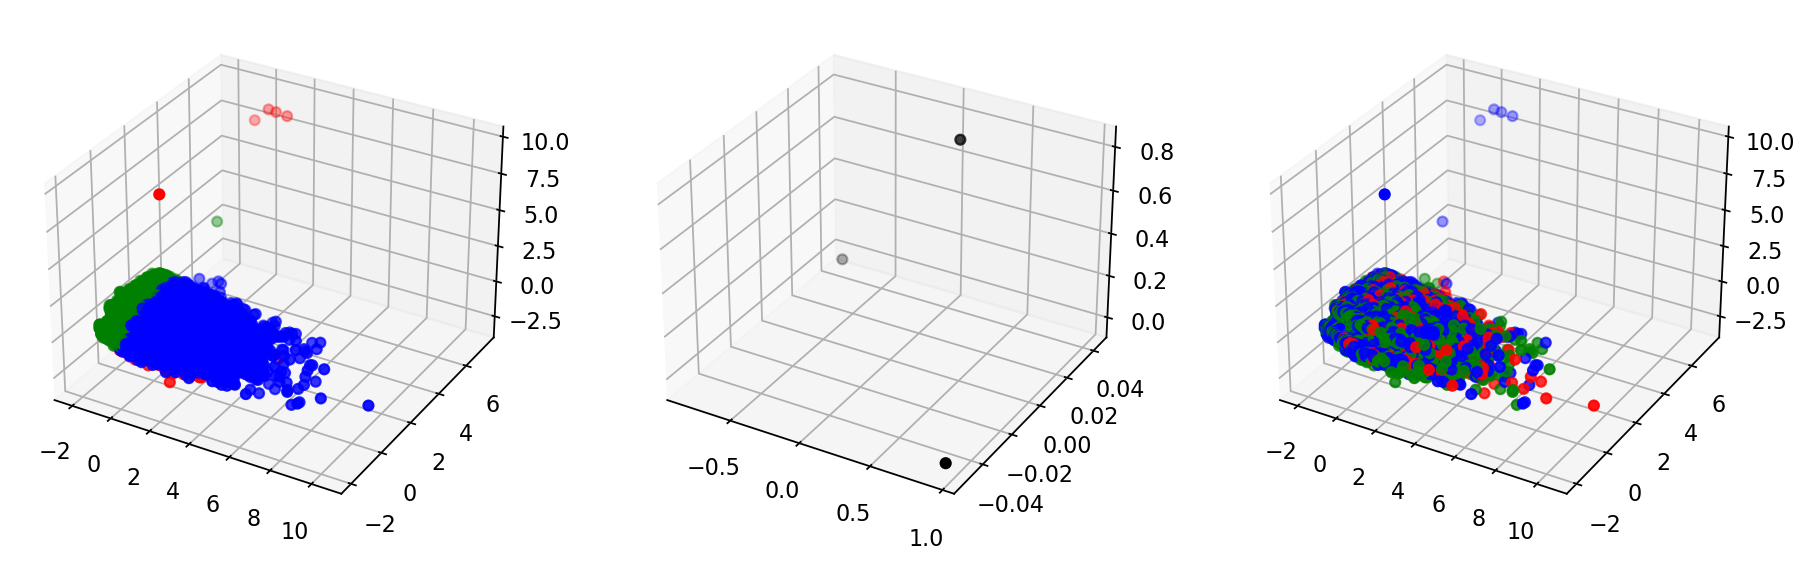

In [325]:
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
colors = ["red", "green", "blue"]

#filter rows of original data
filtered_3D_label0 = for_3D_visualization[model.labels_ == 0]
filtered_3D_label1 = for_3D_visualization[model.labels_ == 1]
filtered_3D_label2 = for_3D_visualization[model.labels_ == 2]


fig = plt.figure(figsize=(14, 6), dpi=160)
ax = fig.add_subplot(1,3,1, projection='3d')
ax1 = fig.add_subplot(1,3,2, projection='3d')
ax2 = fig.add_subplot(1,3,3, projection='3d')

#map the colors to the labels
colors_map = list(map(lambda l: colors[l], model.labels_))
print(len(colors_map))
ax.scatter(for_3D_visualization.iloc[:,0], for_3D_visualization.iloc[:,1], for_3D_visualization.iloc[:,2], c=colors_map)

# ax.scatter(filtered_3D_label0.iloc[:,0], filtered_3D_label0.iloc[:,1], filtered_3D_label0.iloc[:,2], c=colors_map)
# ax.scatter(filtered_3D_label1.iloc[:,0], filtered_3D_label1.iloc[:,1], filtered_3D_label1.iloc[:,2], c=colors_map)
# ax.scatter(filtered_3D_label2.iloc[:,0], filtered_3D_label2.iloc[:,1], filtered_3D_label2.iloc[:,2], c=colors_map)
# ax.set_xlabel("sepal_length")
# ax.set_ylabel("petal_length")
# ax.set_zlabel("petal_width")

#plot the 3 cluster centres
flat_c= ["black","black","black"]
C = model.cluster_centers_

ax1.scatter(C[:,0], C[:,1], C[:,2], c=flat_c)
# ax1.set_xlabel("sepal_length")
# ax1.set_ylabel("petal_length")
# ax1.set_zlabel("petal_width")

colors1 = ["red","green","blue"]
colors_orig_map = list(map(lambda l: colors1[l], encoding))

ax2.scatter(for_3D_visualization.iloc[:,0], for_3D_visualization.iloc[:,1], for_3D_visualization.iloc[:,2], c=colors_orig_map)

plt.show()

In [334]:
from kmodes.kprototypes import KPrototypes

In [335]:
# filtered_cluster.select_dtypes(include=['object']).columns.tolist()
categorical_indexes = []
for index, i in enumerate(filtered_cluster.columns):
    if filtered_cluster.dtypes[i] == "object":
        categorical_indexes.append(index)
preds_prototype = KPrototypes(n_clusters=3).fit_predict(filtered_cluster, categorical=categorical_indexes)
preds_prototype

array([2, 1, 0, ..., 2, 1, 0], dtype=uint16)

In [338]:

# for_kmode_visualization['cluster_id'] = preds_prototype
# print(for_visualization.shape)
famd = FAMD(n_components=2).fit(filtered_cluster)
for_kmode_visualization = famd.row_coordinates(filtered_cluster)

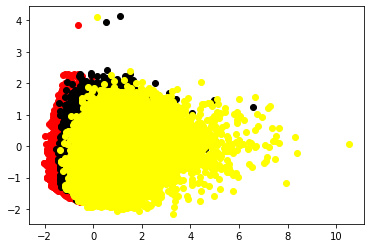

In [339]:
#filter rows of original data
filtered_label0 = for_kmode_visualization[preds_prototype == 0]

filtered_label1 = for_kmode_visualization[preds_prototype == 1]
filtered_label2 = for_kmode_visualization[preds_prototype == 2]
#Plotting the results
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , color = 'red')
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , color = 'black')
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , color = 'yellow')
plt.show()

In [340]:
famd = FAMD(n_components=3).fit(filtered_cluster)
for_kmode_visualization = famd.row_coordinates(filtered_cluster)

70478


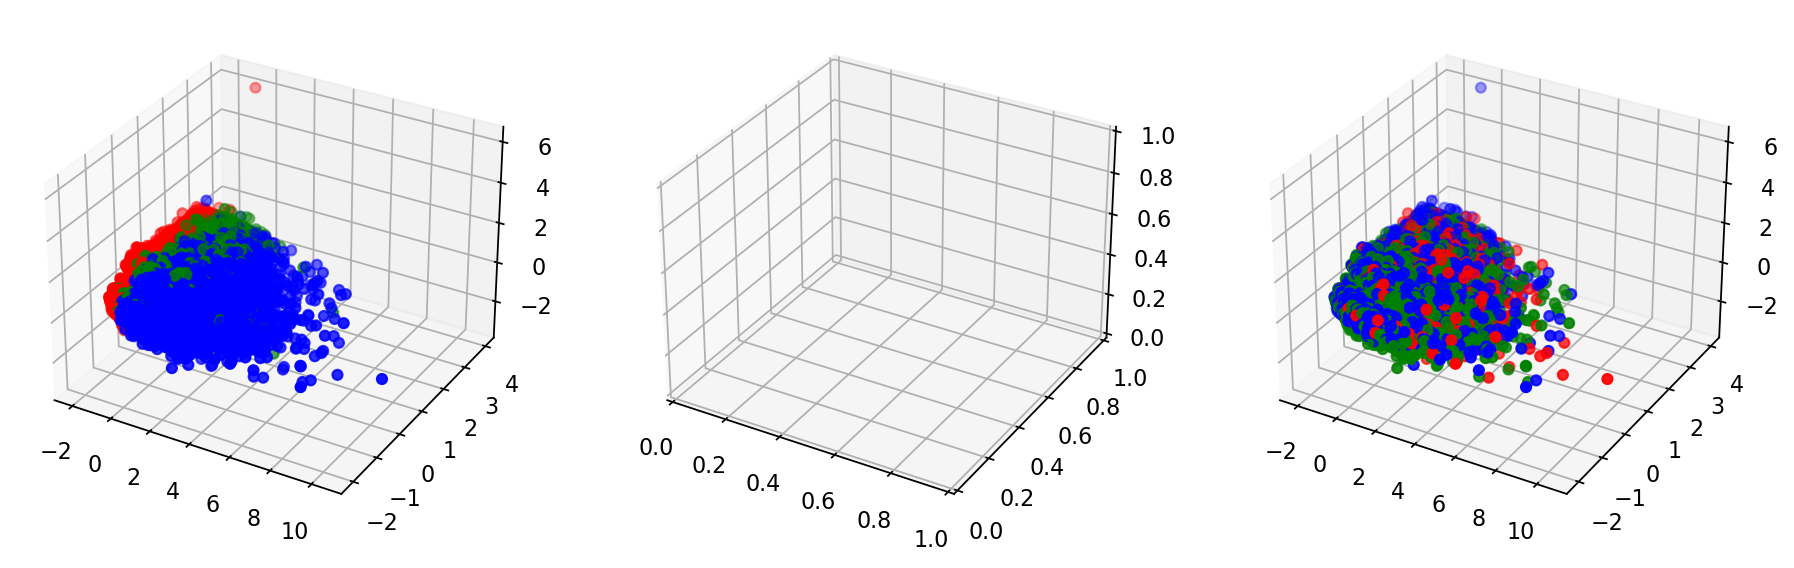

In [344]:
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
colors = ["red", "green", "blue"]

#filter rows of original data

fig = plt.figure(figsize=(14, 6), dpi=160)
ax = fig.add_subplot(1,3,1, projection='3d')
ax1 = fig.add_subplot(1,3,2, projection='3d')
ax2 = fig.add_subplot(1,3,3, projection='3d')

#map the colors to the labels
colors_map = list(map(lambda l: colors[l], preds_prototype))
print(len(colors_map))
ax.scatter(for_kmode_visualization.iloc[:,0], for_kmode_visualization.iloc[:,1], for_kmode_visualization.iloc[:,2], c=colors_map)

#plot the 3 cluster centres
# flat_c= ["black","black","black"]
# C = KPrototypes(n_clusters=3).fit(filtered_cluster, categorical=categorical_indexes).cluster_centers_

# ax1.scatter(C[:,0], C[:,1], C[:,2], c=flat_c)

colors1 = ["red","green","blue"]
colors_orig_map = list(map(lambda l: colors1[l], encoding))

ax2.scatter(for_kmode_visualization.iloc[:,0], for_kmode_visualization.iloc[:,1], for_kmode_visualization.iloc[:,2], c=colors_orig_map)

plt.show()